# **Load Package**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import pylab
# Importing the SimpleImputer class 
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix,roc_curve,roc_auc_score,accuracy_score

In [ ]:
pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows',500)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# **Data Load**

In [ ]:
# Making a list of missing value types
missing_values = ["n/a", "na", "--","#NAME?","NULL","NA","#N/A"]
data_df = pd.read_csv("/content/drive/MyDrive/ML_Case_Study_Practice_Self/trainingData.csv",na_values= missing_values)

In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Id                     40000 non-null  int64  
 1   city                   38134 non-null  object 
 2   age                    40000 non-null  int64  
 3   sex                    40000 non-null  object 
 4   social_class           34745 non-null  object 
 5   primary_business       39974 non-null  object 
 6   secondary_business     34759 non-null  object 
 7   annual_income          40000 non-null  float64
 8   monthly_expenses       39880 non-null  float64
 9   old_dependents         40000 non-null  int64  
 10  young_dependents       40000 non-null  int64  
 11  home_ownership         39621 non-null  float64
 12  type_of_house          39306 non-null  object 
 13  occupants_count        40000 non-null  int64  
 14  house_area             40000 non-null  float64
 15  sa

In [ ]:
data_df.head()

,Id,city,age,sex,social_class,primary_business,secondary_business,annual_income,monthly_expenses,old_dependents,young_dependents,home_ownership,type_of_house,occupants_count,house_area,sanitary_availability,water_availabity,loan_purpose,loan_tenure,loan_installments,loan_amount
0,1,Dhanbad,22,F,Mochi,Tailoring,Others,36000.00,5000.00,0,2,1.00,R,4,70.00,1.00,0.50,Apparels,12,12,5000.00
1,2,Manjapra,21,F,OBC,Tailoring,none,94000.00,3600.00,1,1,1.00,T1,4,80.00,1.00,0.50,Apparels,12,50,7500.00
2,3,Dhanbad,24,M,Nai,Beauty salon,Others,48000.00,4000.00,0,2,1.00,T1,4,50.00,1.00,0.50,Beauty Salon,12,12,5000.00
3,4,NaN,26,F,OBC,Tailoring,none,7000.00,5000.00,0,2,1.00,T1,5,50.00,1.00,0.50,Apparels,12,50,7500.00
4,5,Nuapada,23,F,OBC,General store,Agriculture,36000.00,3500.00,0,0,1.00,T1,1,112.00,1.00,0.50,Retail Store,12,12,5000.00


## Data Cleaning

## Duplicate records

In [ ]:
dups = data_df.duplicated()
data_df[dups]

,Id,city,age,sex,social_class,primary_business,secondary_business,annual_income,monthly_expenses,old_dependents,young_dependents,home_ownership,type_of_house,occupants_count,house_area,sanitary_availability,water_availabity,loan_purpose,loan_tenure,loan_installments,loan_amount


**No duplicate records**

# **EDA - Exploratory Data Analysis**

## Missing Values

In [ ]:
Missing_data = data_df.isnull().sum().rename_axis('Feature Name').reset_index(name='Missing Values')
Missing_data['Missing_percentage'] = Missing_data['Missing Values']/len(data_df)
Missing_data.sort_values('Missing_percentage',ascending=False)

,Feature Name,Missing Values,Missing_percentage
4,social_class,5255,0.13
16,water_availabity,5253,0.13
6,secondary_business,5241,0.13
1,city,1866,0.05
12,type_of_house,694,0.02
11,home_ownership,379,0.01
15,sanitary_availability,208,0.01
8,monthly_expenses,120,0.00
5,primary_business,26,0.00
17,loan_purpose,26,0.00


##**Target Feature**

In [ ]:
data_df.loan_amount.describe(percentiles = [0.01,0.05,0.1,0.95,0.96,0.97,0.98,0.99,0.995,0.996,0.997,0.998,
                                         0.999,0.9991,0.9992,0.9993])

count      40000.00
mean        8412.59
std        13596.94
min          100.00
1%          3000.00
5%          5000.00
10%         5000.00
50%         8000.00
95%        15000.00
96%        15000.00
97%        15000.00
98%        15000.00
99%        15000.00
99.5%      18000.00
99.6%      20000.00
99.7%      20000.00
99.8%      20000.00
99.9%      50000.00
99.91%     50000.00
99.92%     50009.60
99.93%    100000.00
max      1343000.00
Name: loan_amount, dtype: float64

In [ ]:
data_df['loan_amount'].value_counts(normalize=True).reset_index().sort_values('loan_amount',ascending=False)

,index,loan_amount
0,5000.00,0.30
1,8000.00,0.21
2,10000.00,0.17
3,12000.00,0.08
4,7500.00,0.06
5,15000.00,0.05
6,7000.00,0.03
7,3000.00,0.02
8,6000.00,0.02
9,14000.00,0.01


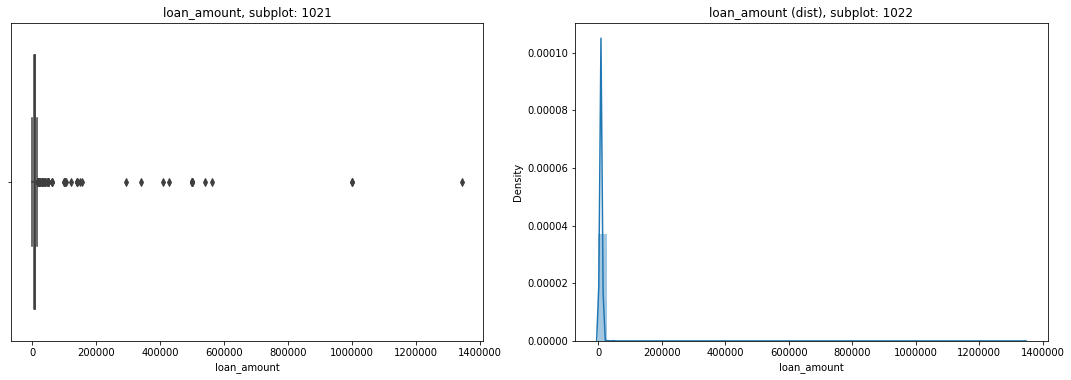

In [ ]:
target_col = ['loan_amount']
a = 10  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(50,40))
fig.set_size_inches(15, 50)

for i in target_col:
    plt.subplot(a, b, c)
    plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    plt.ticklabel_format(style='plain', axis='x')
    sns.boxplot(data_df[i])
    c = c + 1
    
    plt.subplot(a, b, c)
    plt.title('{} (dist), subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    plt.xticks()
    plt.ticklabel_format(style='plain', axis='x')
    sns.distplot(data_df[i])
    c = c + 1

plt.tight_layout()
plt.show();

## **Numerical Features**

In [ ]:
num_cols = data_df.select_dtypes(exclude = 'object').columns.tolist()
num_data = data_df[num_cols]
num_data.head()

,Id,age,annual_income,monthly_expenses,old_dependents,young_dependents,home_ownership,occupants_count,house_area,sanitary_availability,water_availabity,loan_tenure,loan_installments,loan_amount
0,1,22,36000.00,5000.00,0,2,1.00,4,70.00,1.00,0.50,12,12,5000.00
1,2,21,94000.00,3600.00,1,1,1.00,4,80.00,1.00,0.50,12,50,7500.00
2,3,24,48000.00,4000.00,0,2,1.00,4,50.00,1.00,0.50,12,12,5000.00
3,4,26,7000.00,5000.00,0,2,1.00,5,50.00,1.00,0.50,12,50,7500.00
4,5,23,36000.00,3500.00,0,0,1.00,1,112.00,1.00,0.50,12,12,5000.00


In [ ]:
cat_cols_as_num = ['old_dependents','young_dependents','home_ownership','occupants_count',
            'sanitary_availability','water_availabity']

In [ ]:
num_cols = [num_col for num_col in num_cols if num_col not in cat_cols_as_num]
num_data = data_df[num_cols]

In [ ]:
num_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,40000.00,20000.50,11547.15,1.00,10000.75,20000.50,30000.25,40000.00
age,40000.00,55.16,3830.36,2.00,29.00,35.00,42.00,766105.00
annual_income,40000.00,37640.21,28739.12,0.00,14400.00,36000.00,56000.00,1200000.00
monthly_expenses,39880.00,3810.88,4592.96,2.00,2500.00,3500.00,4000.00,240000.00
house_area,40000.00,552.80,4596.92,0.00,200.00,400.00,600.00,700000.00
loan_tenure,40000.00,12.03,1.37,3.00,12.00,12.00,12.00,84.00
loan_installments,40000.00,21.76,16.68,0.00,12.00,12.00,50.00,84.00
loan_amount,40000.00,8412.59,13596.94,100.00,5000.00,8000.00,10000.00,1343000.00


Age and House area features have wrong values (max value) hence we need to replace that one.

## Missing values treatment

In [ ]:
def missing_impute(df):
    
    imputer = SimpleImputer(missing_values = np.nan,strategy ='median')
    miss_cols = df.columns[df.isnull().any()].tolist()
    
    for i in miss_cols:
        df[i] = imputer.fit_transform(df[[i]].copy()).ravel()
    return df

num_data = missing_impute(num_data)

## Outliers Treatment

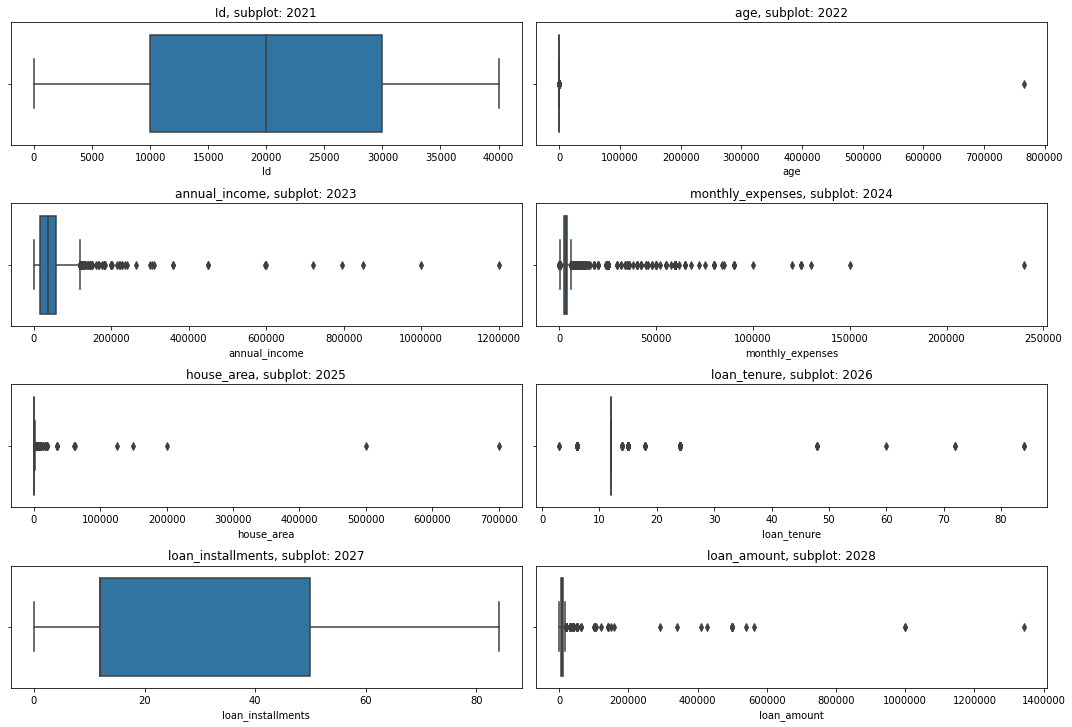

In [ ]:
a = 20
b = 2
c = 1

fig = plt.figure(figsize=(50,40))
fig.set_size_inches(15, 50)

for i in num_cols:
    plt.subplot(a, b, c)
    plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    plt.ticklabel_format(style='plain', axis='x')
    sns.boxplot(num_data[i])
    c = c + 1

    plt.tight_layout()
plt.show();

In [ ]:
num_data['loan_tenure'].value_counts(normalize=True)

12   0.98
6    0.01
24   0.01
15   0.00
14   0.00
18   0.00
48   0.00
84   0.00
72   0.00
3    0.00
60   0.00
Name: loan_tenure, dtype: float64

Loan Tenure is not that useful since 98% of the past applications are for 12 months tenure

In [ ]:
num_cols[:-3]

['Id', 'age', 'annual_income', 'monthly_expenses', 'house_area']

In [ ]:
# General Function to remove outlier
def treat_outlier(df):
    
    for col in num_cols[:-3]:
        q1,q3 = df[col].quantile([0.01,0.99])
        lri = q1
        uri = q3
        df[col] = np.where(df[col] > uri, uri, df[col])
        df[col] = np.where(df[col] < lri, lri, df[col])
   
    return df

num_data = treat_outlier(num_data)

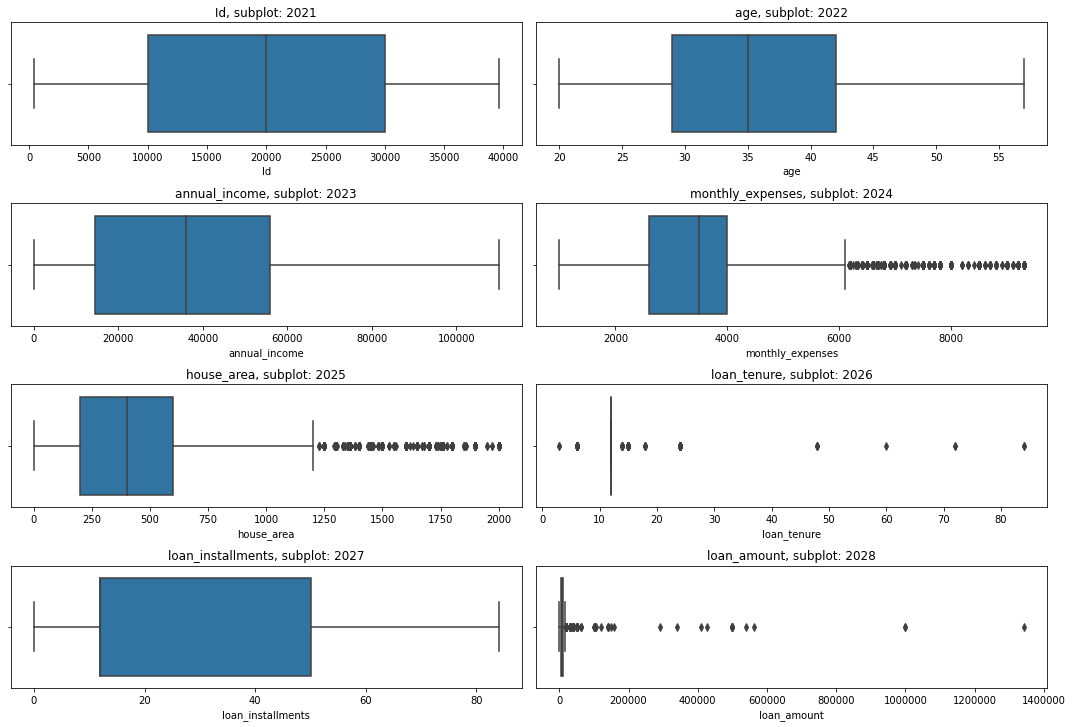

In [ ]:
a = 20
b = 2
c = 1

fig = plt.figure(figsize=(50,40))
fig.set_size_inches(15, 50)

for i in num_cols:
    plt.subplot(a, b, c)
    plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    plt.ticklabel_format(style='plain', axis='x')
    sns.boxplot(num_data[i])
    c = c + 1

    plt.tight_layout()
plt.show();

#**Feature Engineering** 

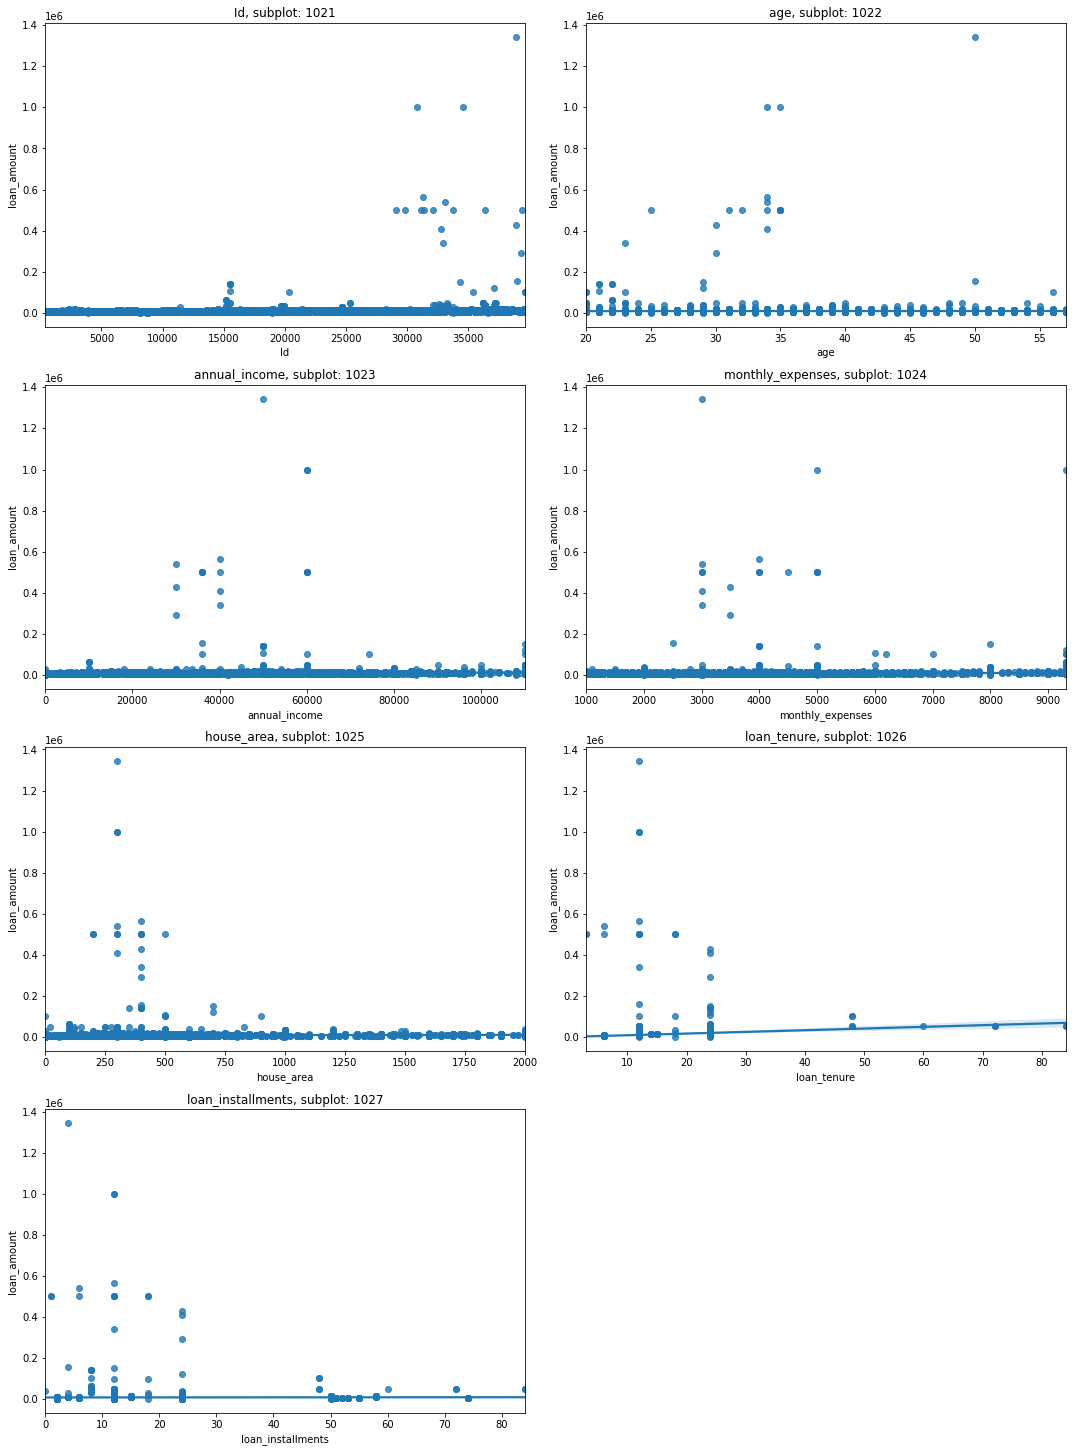

In [ ]:
a = 10
b = 2
c = 1

fig = plt.figure(figsize=(50,40))
fig.set_size_inches(15, 50)

for i in num_cols[:-1]:
    plt.subplot(a, b, c)
    plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    plt.ticklabel_format(style='plain', axis='x')
    sns.regplot(x = i, y = 'loan_amount', data=num_data)
    c = c + 1

    plt.tight_layout()
plt.show();

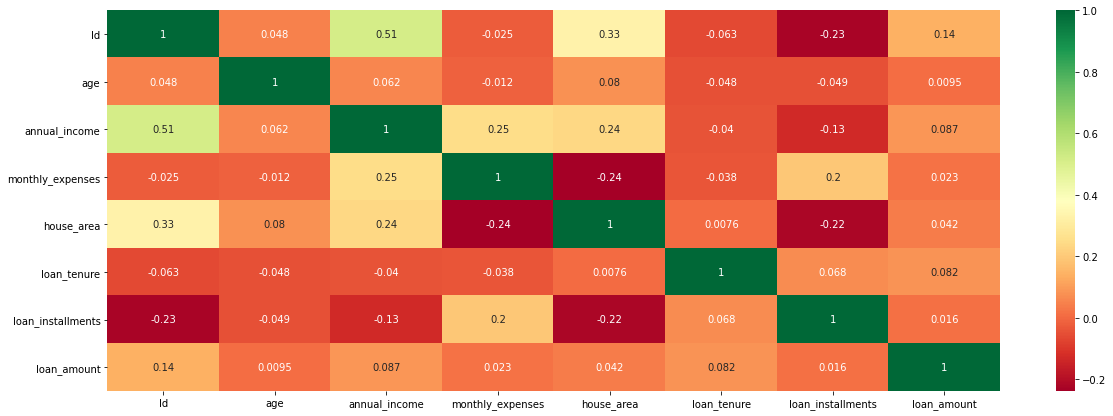

In [ ]:
plt.figure(figsize=(20,7))
sns.heatmap(num_data.corr(),annot=True,cmap="RdYlGn");

### Multicategory Target

In [ ]:
def loan_amount_fix(col):
    if 0 <= col <= 5000:
        return '0-5K'
    elif 5000 < col <= 10000:
        return '5-10K'
    elif 10000 < col <= 15000:
        return '10-15K'
    elif 15000 < col <= 50000:
        return '15-50K'
    elif 50000 < col:
        return '50K+'

In [ ]:
num_data['loan_amount_bucket_1'] = num_data[['loan_amount']].apply(lambda x: loan_amount_fix(x['loan_amount']),axis=1)

In [ ]:
num_data['loan_amount_bucket_1'].value_counts()

5-10K     20113
0-5K      13156
10-15K     6520
15-50K      179
50K+         32
Name: loan_amount_bucket_1, dtype: int64

In [ ]:
num_data['loan_amount_bucket_1'].value_counts(normalize = True)

5-10K    0.50
0-5K     0.33
10-15K   0.16
15-50K   0.00
50K+     0.00
Name: loan_amount_bucket_1, dtype: float64

### 3 Categories

In [ ]:
def loan_amount_fix_N(col):
    if 0 <= col <= 5000:
        return '0-5K'
    elif 5000 < col <= 10000:
        return '5-10K'
    elif 10000 < col:
        return '10K+'

In [ ]:
num_data['loan_amount_bucket_2'] = num_data[['loan_amount']].apply(lambda x: loan_amount_fix_N(x['loan_amount']),axis=1)

In [ ]:
num_data['loan_amount_bucket_2'].value_counts(normalize = True)

5-10K   0.50
0-5K    0.33
10K+    0.17
Name: loan_amount_bucket_2, dtype: float64

### Binary target - 10K

In [ ]:
def loan_amount_fix_2(col):
    if 0 <= col <= 10000:
        return '0-10K'
    elif 10000 < col:
        return '10K+'

In [ ]:
num_data['loan_amount_bucket_3'] = num_data[['loan_amount']].apply(lambda x: loan_amount_fix_2(x['loan_amount']),axis=1)

In [ ]:
num_data['loan_amount_bucket_3'].value_counts()

0-10K    33269
10K+      6731
Name: loan_amount_bucket_3, dtype: int64

In [ ]:
num_data['loan_amount_bucket_3'].value_counts(normalize = True)

0-10K   0.83
10K+    0.17
Name: loan_amount_bucket_3, dtype: float64

### Binary Target 0-5K, 5K+

In [ ]:
def loan_amount_fix_2(col):
    if 0 <= col <= 5000:
        return '0-5K'
    elif 5000 < col:
        return '5K+'

In [ ]:
num_data['loan_amount_bucket_4'] = num_data[['loan_amount']].apply(lambda x: loan_amount_fix_2(x['loan_amount']),axis=1)

In [ ]:
num_data['loan_amount_bucket_4'].value_counts()

5K+     26844
0-5K    13156
Name: loan_amount_bucket_4, dtype: int64

In [ ]:
num_data['loan_amount_bucket_4'].value_counts(normalize = True)

5K+    0.67
0-5K   0.33
Name: loan_amount_bucket_4, dtype: float64

In [ ]:
num_data.head()

,Id,age,annual_income,monthly_expenses,house_area,loan_tenure,loan_installments,loan_amount,loan_amount_bucket_1,loan_amount_bucket_2,loan_amount_bucket_3,loan_amount_bucket_4
0,400.99,22.00,36000.00,5000.00,70.00,12,12,5000.00,0-5K,0-5K,0-10K,0-5K
1,400.99,21.00,94000.00,3600.00,80.00,12,50,7500.00,5-10K,5-10K,0-10K,5K+
2,400.99,24.00,48000.00,4000.00,50.00,12,12,5000.00,0-5K,0-5K,0-10K,0-5K
3,400.99,26.00,7000.00,5000.00,50.00,12,50,7500.00,5-10K,5-10K,0-10K,5K+
4,400.99,23.00,36000.00,3500.00,112.00,12,12,5000.00,0-5K,0-5K,0-10K,0-5K


In [ ]:
num_data.columns

Index(['Id', 'age', 'annual_income', 'monthly_expenses', 'house_area',
       'loan_tenure', 'loan_installments', 'loan_amount',
       'loan_amount_bucket_1', 'loan_amount_bucket_2', 'loan_amount_bucket_3',
       'loan_amount_bucket_4'],
      dtype='object')

Lets consider the loan_amount_bucket_3 as the target feature for the classification exercise

## **Bi-Variate Analysis**
Categorical Target and continuous predictors

In [ ]:
y_feature = ['age', 'annual_income', 'monthly_expenses', 'house_area', 'loan_tenure','loan_installments']
x_feature = ['loan_amount_bucket_1','loan_amount_bucket_2', 'loan_amount_bucket_3', 'loan_amount_bucket_4']

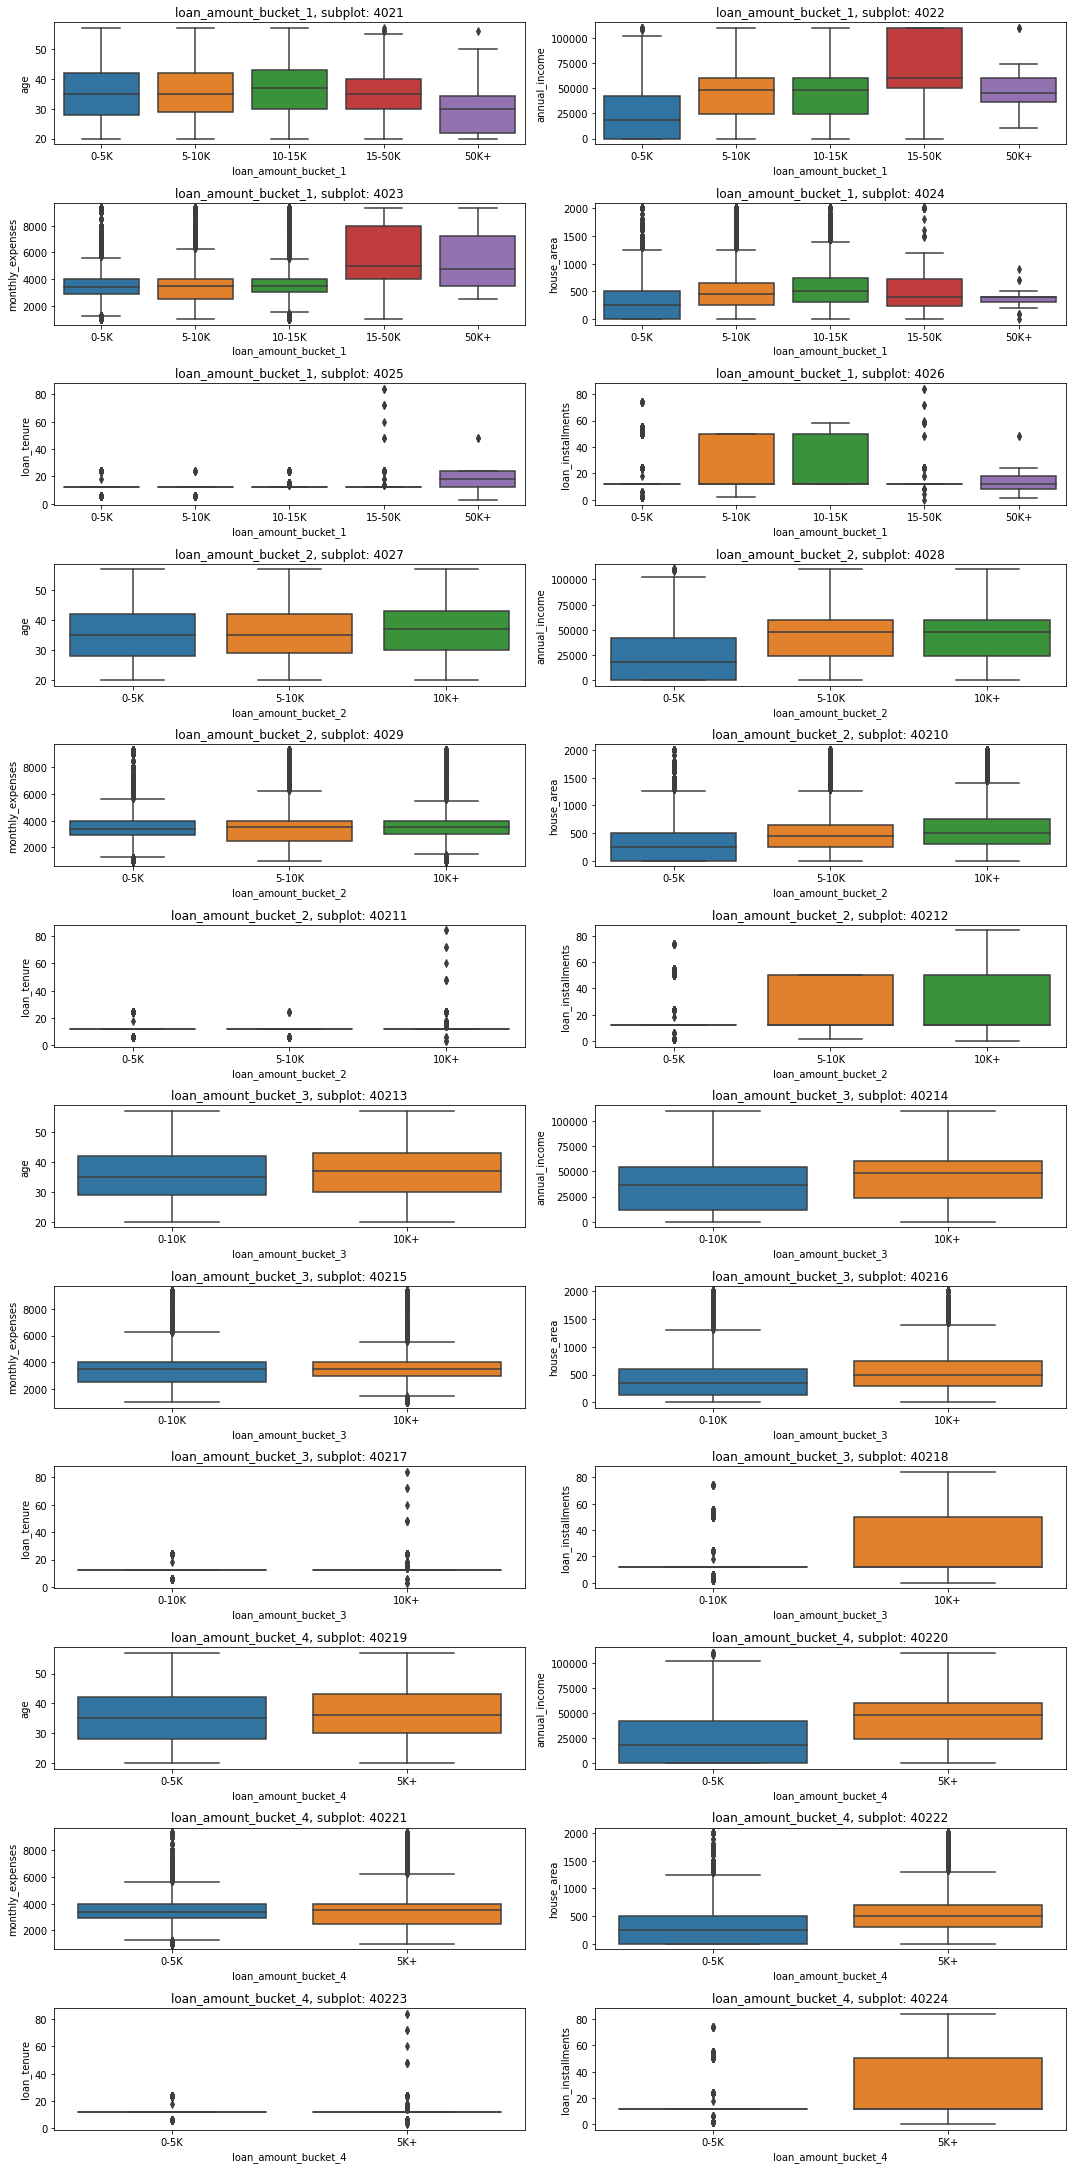

In [ ]:
a = 40
b = 2
c = 1

fig = plt.figure(figsize=(50,40))
fig.set_size_inches(15, 100)

for i in x_feature:
    for j in y_feature:
        plt.subplot(a, b, c)
        plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
        plt.xlabel(i)
        sns.boxplot(num_data[i], num_data[j])
        c = c + 1

plt.tight_layout()
plt.show();

### **Installments**

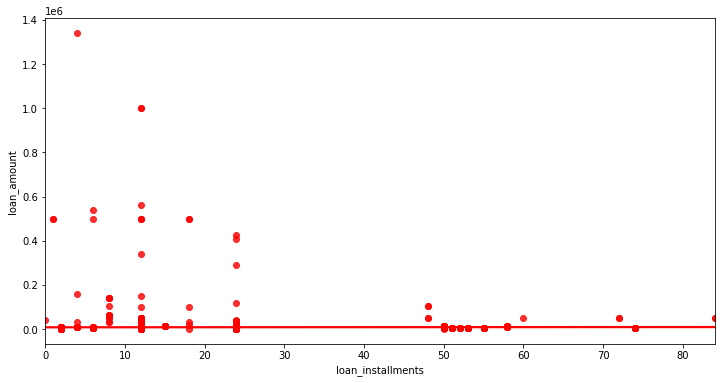

In [ ]:
plt.figure(figsize = (12,6))
sns.regplot(x = 'loan_installments', y = 'loan_amount', data=num_data,color = 'r')

In [ ]:
num_data.loan_installments.value_counts()

12    28980
50    10097
6       344
24      232
2        94
51       74
15       53
53       29
55       25
4        15
8        12
74       11
58       10
18        6
52        6
48        4
72        2
1         2
84        2
60        1
0         1
Name: loan_installments, dtype: int64

In [ ]:
def loan_instlmnt_Fix(col):
    if 0 <= col <= 12:
        return '0-12 Installments'
    elif 12 < col:
        return '12+ Installments'

In [ ]:
num_data['loan_installments_bucket'] = num_data[['loan_installments']].apply(lambda x: loan_instlmnt_Fix(x['loan_installments']),axis=1)

In [ ]:
num_data['loan_installments_bucket'].value_counts(normalize=True)

0-12 Installments   0.74
12+ Installments    0.26
Name: loan_installments_bucket, dtype: float64

<Figure size 720x648 with 0 Axes>

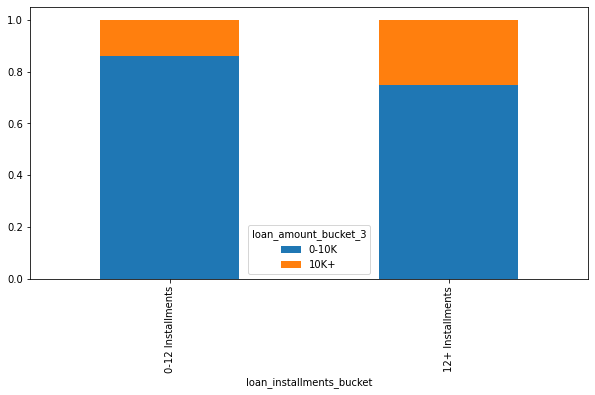

In [ ]:
plt.figure(figsize=(10,9))
data = pd.crosstab(num_data['loan_installments_bucket'], num_data['loan_amount_bucket_3'])
data.div(data.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, figsize = (10, 5));

<Figure size 720x648 with 0 Axes>

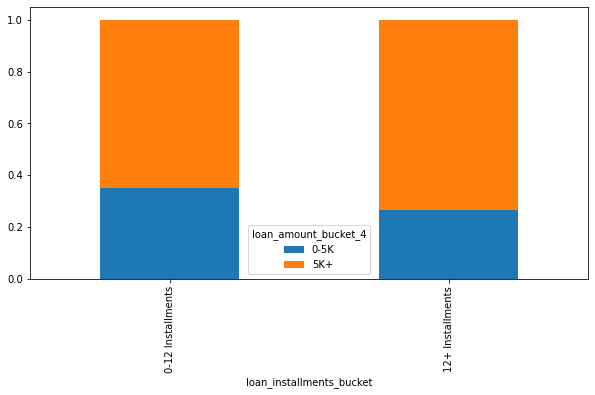

In [ ]:
plt.figure(figsize=(10,9))
data = pd.crosstab(num_data['loan_installments_bucket'], num_data['loan_amount_bucket_4'])
data.div(data.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, figsize = (10, 5));

### Tenure

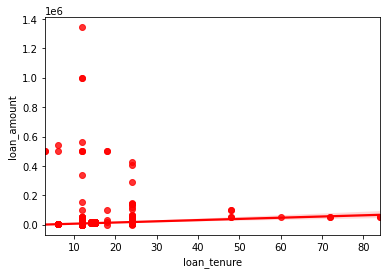

In [ ]:
sns.regplot(x = 'loan_tenure', y = 'loan_amount', data = num_data, color = 'r')

In [ ]:
num_data.loan_tenure.value_counts(normalize = True)

12   0.98
6    0.01
24   0.01
15   0.00
14   0.00
18   0.00
48   0.00
84   0.00
72   0.00
3    0.00
60   0.00
Name: loan_tenure, dtype: float64

In [ ]:
def loan_tenure_Fix(col):
    if 0 <= col <= 12:
        return '0-12 Installments'
    elif 12 < col:
        return '12+ Installments'

In [ ]:
num_data['loan_tenure_bucket'] = num_data[['loan_tenure']].apply(lambda x: loan_tenure_Fix(x['loan_tenure']),axis=1)

In [ ]:
num_data['loan_tenure_bucket'].value_counts(normalize = True)

0-12 Installments   0.99
12+ Installments    0.01
Name: loan_tenure_bucket, dtype: float64

<Figure size 720x648 with 0 Axes>

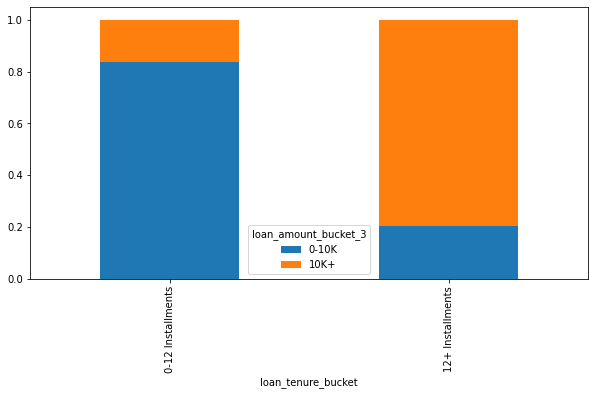

In [ ]:
plt.figure(figsize=(10,9))
data = pd.crosstab(num_data['loan_tenure_bucket'], num_data['loan_amount_bucket_3'])
data.div(data.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, figsize = (10, 5));

<Figure size 720x648 with 0 Axes>

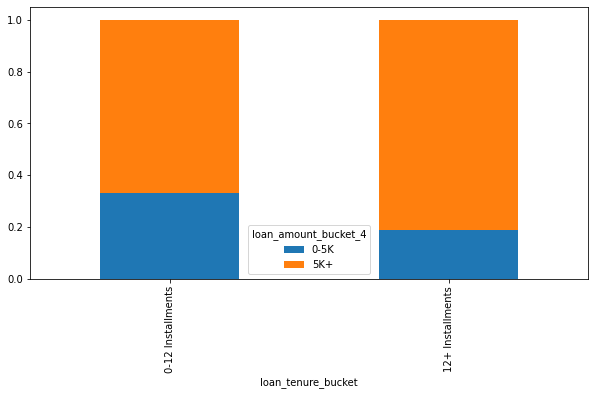

In [ ]:
plt.figure(figsize=(10,9))
data = pd.crosstab(num_data['loan_tenure_bucket'], num_data['loan_amount_bucket_4'])
data.div(data.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, figsize = (10, 5))

### Age

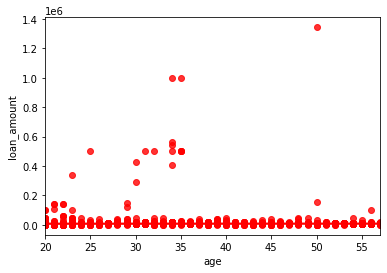

In [ ]:
sns.regplot(x = 'age', y = 'loan_amount', data = num_data, color = 'r');

In [ ]:
num_data.age.value_counts()

35.00    2548
40.00    2514
30.00    2331
45.00    1889
32.00    1642
38.00    1534
25.00    1524
28.00    1498
36.00    1409
26.00    1330
42.00    1290
27.00    1212
37.00    1197
34.00    1142
29.00    1125
33.00    1123
39.00    1028
31.00    1026
41.00     998
43.00     984
24.00     936
46.00     912
48.00     878
44.00     816
23.00     788
22.00     788
20.00     769
50.00     739
47.00     733
49.00     518
21.00     499
57.00     462
51.00     389
52.00     377
53.00     347
55.00     301
54.00     247
56.00     157
Name: age, dtype: int64

In [ ]:
def age_Fix(col):
    if 0 <= col <= 25:
        return '0-25 Years'
    elif 25 < col:
        return '25+ Years'

In [ ]:
num_data['Age_bucket'] = num_data[['age']].apply(lambda x: age_Fix(x['age']),axis=1)

<Figure size 720x648 with 0 Axes>

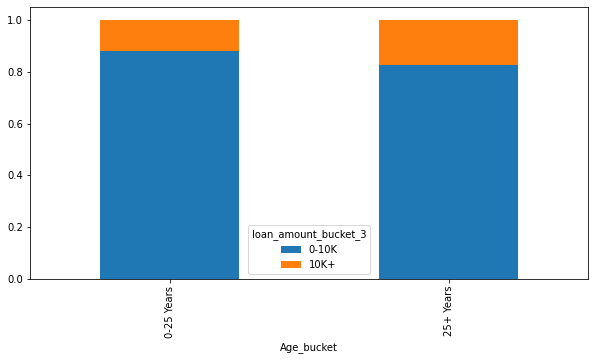

In [ ]:
plt.figure(figsize=(10,9))
data = pd.crosstab(num_data['Age_bucket'], num_data['loan_amount_bucket_3']);
data.div(data.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, figsize = (10, 5));

<Figure size 720x648 with 0 Axes>

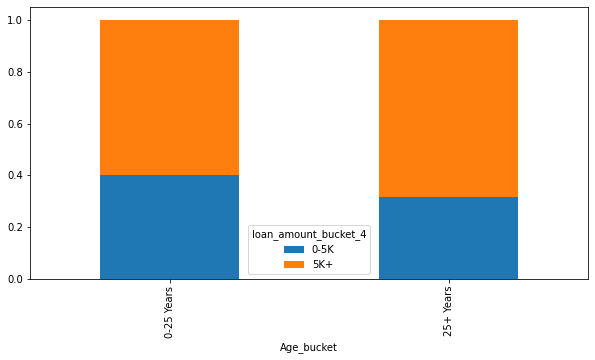

In [ ]:
plt.figure(figsize=(10,9))
data = pd.crosstab(num_data['Age_bucket'], num_data['loan_amount_bucket_4']);
data.div(data.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, figsize = (10, 5));

### Monthly_expenses

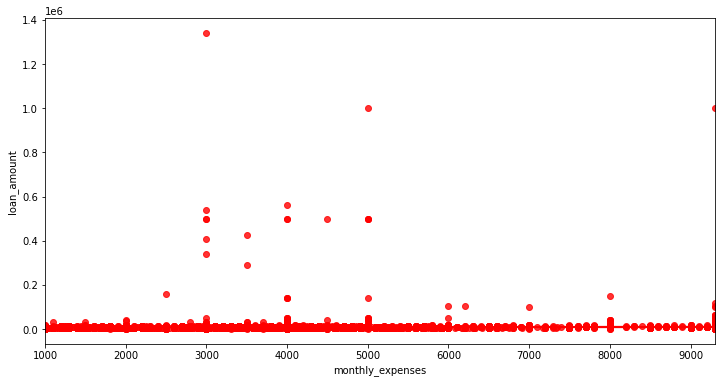

In [ ]:
plt.figure(figsize = (12,6))
sns.regplot(x = 'monthly_expenses', y = 'loan_amount', data=num_data,color = 'r')

In [ ]:
num_data.monthly_expenses.value_counts().nlargest(10)

3000.00    6397
4000.00    6196
3500.00    3452
2000.00    3135
2500.00    2767
5000.00    2080
1500.00    1502
4500.00    1372
3200.00     771
3800.00     763
Name: monthly_expenses, dtype: int64

In [ ]:
def monthly_Fix(col):
    if 0 <= col <= 2000:
        return '0-2K'
    elif 2000 < col <= 9000:
        return '2-9K'
    elif 9000 < col:
        return '9K+'

In [ ]:
num_data['monthly_expenses_bucket'] = num_data[['monthly_expenses']].apply(lambda x: monthly_Fix(x['monthly_expenses']),axis=1)

In [ ]:
num_data['monthly_expenses_bucket'].value_counts(normalize=True)

2-9K   0.83
0-2K   0.16
9K+    0.01
Name: monthly_expenses_bucket, dtype: float64

<Figure size 720x648 with 0 Axes>

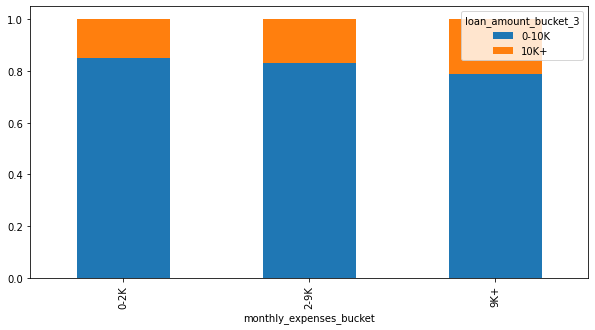

In [ ]:
plt.figure(figsize=(10,9))
data = pd.crosstab(num_data['monthly_expenses_bucket'], num_data['loan_amount_bucket_3']);
data.div(data.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, figsize = (10, 5));

<Figure size 720x648 with 0 Axes>

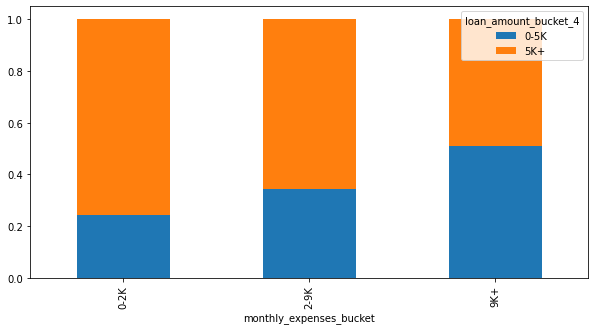

In [ ]:
plt.figure(figsize=(10,9))
data = pd.crosstab(num_data['monthly_expenses_bucket'], num_data['loan_amount_bucket_4']);
data.div(data.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, figsize = (10, 5));

### Annual_income

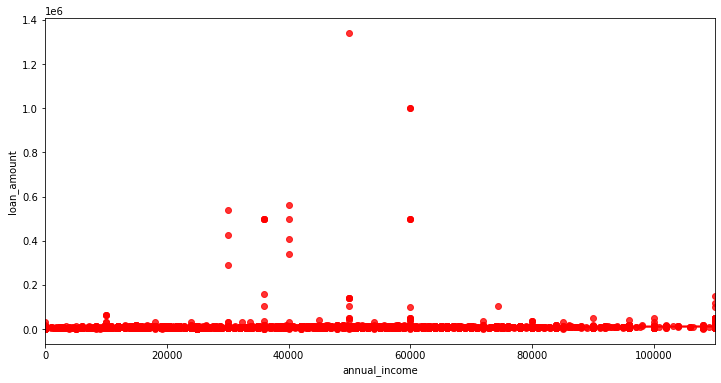

In [ ]:
plt.figure(figsize = (12,6))
sns.regplot(x = 'annual_income', y = 'loan_amount', data=num_data,color = 'r');

In [ ]:
num_data.annual_income.value_counts().nlargest(10)

0.00        5702
48000.00    4782
60000.00    4635
36000.00    3071
24000.00    2617
12000.00    1841
54000.00    1756
18000.00    1599
30000.00    1117
72000.00    1083
Name: annual_income, dtype: int64

**A lot of people have 0 Income**

In [ ]:
num_data.annual_income.describe(percentiles = [0.05,0.1,0.11,0.12,0.13,0.14,0.143,0.15,0.95,0.96,0.97,0.98,0.99,0.995])

count    40000.00
mean     37320.71
std      25793.37
min          0.00
5%           0.00
10%          0.00
11%          0.00
12%          0.00
13%          0.00
14%          0.00
14.3%     1800.00
15%       6000.00
50%      36000.00
95%      80000.00
96%      84000.00
97%      90000.00
98%      96000.00
99%     110000.00
99.5%   110000.00
max     110000.00
Name: annual_income, dtype: float64

In [ ]:
def income_Fix(col):
    if col == 0:
        return '0 Income'
    elif 0 < col <= 15000:
        return '0-15K'
    elif 15000 < col <= 32000:
        return '15-32K'
    elif 32000 < col <= 50000:
        return '32-50K'
    elif 50000 < col <= 75000:
        return '50-75K'
    elif 75000 < col:
        return '75K+'

In [ ]:
num_data['annual_income_bucket'] = num_data[['annual_income']].apply(lambda x: income_Fix(x['annual_income']),axis=1)

In [ ]:
num_data['annual_income_bucket'].value_counts(normalize=True)

32-50K     0.27
50-75K     0.26
15-32K     0.17
0 Income   0.14
0-15K      0.11
75K+       0.06
Name: annual_income_bucket, dtype: float64

<Figure size 720x648 with 0 Axes>

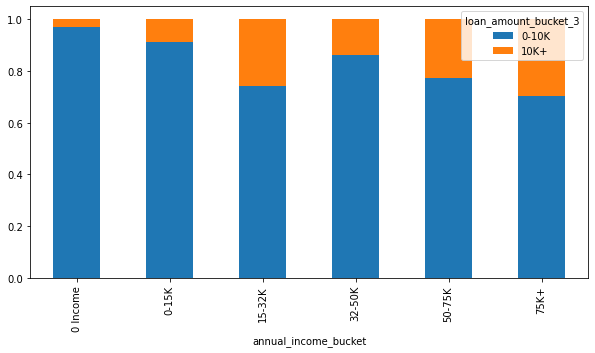

In [ ]:
plt.figure(figsize=(10,9))
data = pd.crosstab(num_data['annual_income_bucket'], num_data['loan_amount_bucket_3']);
data.div(data.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, figsize = (10, 5));

<Figure size 720x648 with 0 Axes>

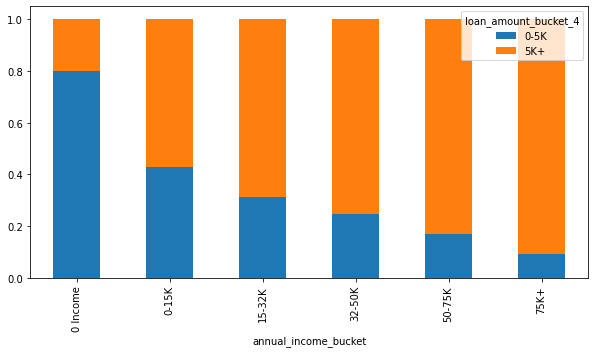

In [ ]:
plt.figure(figsize=(10,9))
data = pd.crosstab(num_data['annual_income_bucket'], num_data['loan_amount_bucket_4']);
data.div(data.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, figsize = (10, 5));

### House Area

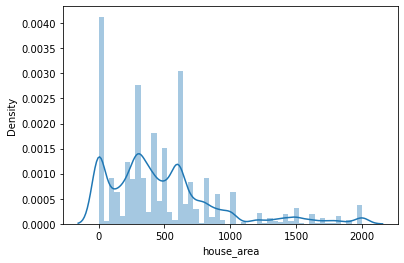

In [ ]:
sns.distplot(num_data.house_area)

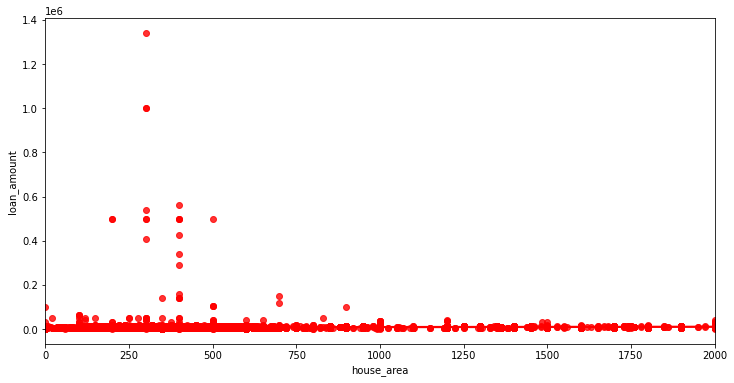

In [ ]:
plt.figure(figsize = (12,6))
sns.regplot(x = 'house_area', y = 'loan_amount', data=num_data,color = 'r');

In [ ]:
num_data.house_area.describe(percentiles = [0.05,0.1,0.11,0.12,0.13,0.14,0.143,0.15,
                                            0.95,0.96,0.97,0.98,0.99,0.995])

count   40000.00
mean      480.63
std       430.08
min         0.00
5%          0.00
10%         0.00
11%         0.00
12%         0.00
13%         2.00
14%         4.00
14.3%       4.00
15%         4.00
50%       400.00
95%      1500.00
96%      1500.00
97%      1700.00
98%      1800.00
99%      2000.00
99.5%    2000.00
max      2000.00
Name: house_area, dtype: float64

In [ ]:
def house_area_Fix(col):
    if col == 0:
        return '0 sqft'
    elif 0 < col <= 500:
        return '0-500 sqft'
    elif 500 < col:
        return '500 sqft+'

In [ ]:
num_data['house_area_bucket'] = num_data[['house_area']].apply(lambda x: house_area_Fix(x['house_area']),axis=1)

In [ ]:
num_data['house_area_bucket'].value_counts(normalize=True)

0-500 sqft   0.50
500 sqft+    0.37
0 sqft       0.13
Name: house_area_bucket, dtype: float64

<Figure size 720x648 with 0 Axes>

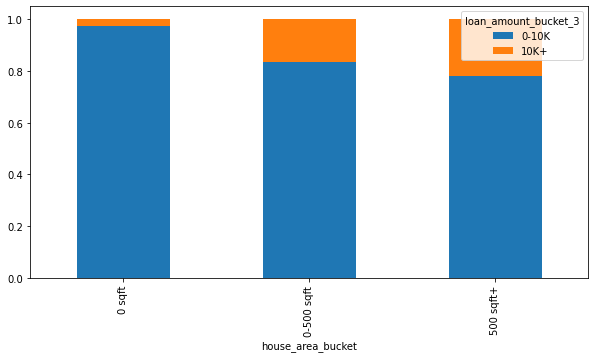

In [ ]:
plt.figure(figsize=(10,9))
data = pd.crosstab(num_data['house_area_bucket'], num_data['loan_amount_bucket_3']);
data.div(data.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, figsize = (10, 5));

<Figure size 720x648 with 0 Axes>

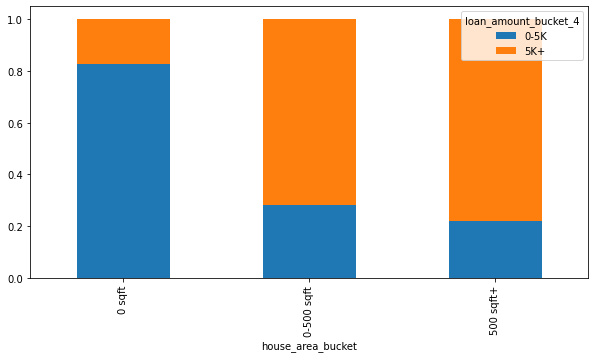

In [ ]:
plt.figure(figsize=(10,9))
data = pd.crosstab(num_data['house_area_bucket'], num_data['loan_amount_bucket_4']);
data.div(data.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, figsize = (10, 5));

## Label Encoding to converted features

In [ ]:
le = LabelEncoder()

In [ ]:
num_enc_cols = ['loan_installments_bucket','loan_tenure_bucket','Age_bucket','monthly_expenses_bucket',
               'annual_income_bucket','house_area_bucket','loan_amount_bucket_3','loan_amount_bucket_4']

In [ ]:
for i in num_enc_cols:
    num_data[i + str('_label_enc')] = le.fit_transform(num_data[i])

### Target Feature Encoding

In [ ]:
num_data['loan_amount_bucket_3'].value_counts()

0-10K    33269
10K+      6731
Name: loan_amount_bucket_3, dtype: int64

In [ ]:
num_data['loan_amount_bucket_4'].value_counts()

5K+     26844
0-5K    13156
Name: loan_amount_bucket_4, dtype: int64

In [ ]:
num_data['loan_amount_bucket_3_label_enc'].value_counts()

0    33269
1     6731
Name: loan_amount_bucket_3_label_enc, dtype: int64

In [ ]:
num_data['loan_amount_bucket_4_label_enc'].value_counts()

1    26844
0    13156
Name: loan_amount_bucket_4_label_enc, dtype: int64

## **Categorical Features**

In [ ]:
cat_cols =  data_df.select_dtypes(include = 'object').columns.tolist()
cat_cols

['city',
 'sex',
 'social_class',
 'primary_business',
 'secondary_business',
 'type_of_house',
 'loan_purpose']

In [ ]:
cat_cols_2 = ['old_dependents','young_dependents','home_ownership','occupants_count',
            'sanitary_availability','water_availabity']

In [ ]:
# Combine both the lists
for col in cat_cols_2:
    cat_cols.append(col)

In [ ]:
cat_data = data_df[cat_cols]

In [ ]:
cat_data = pd.concat([cat_data,data_df[['Id','loan_amount']], num_data[['loan_amount_bucket_1',
                                                                       'loan_amount_bucket_2',
                                                                       'loan_amount_bucket_3',
                                                                       'loan_amount_bucket_4']]],axis=1)

### City

In [ ]:
cat_data.city.value_counts(dropna=False).sort_values(ascending = False).head(20)

Pusad            3154
Bahoriband       1979
NaN              1866
PUSAD            1776
Shantipur        1727
Imphal           1699
Mathurapur       1361
SANDESHKHALI     1087
Joynagar          993
Gwalior           952
Kozhinjampara     897
Muzaffarpur       843
Nuapada           782
Baruipur          730
Pune              637
Parola            637
GWALIOR           635
Jhabua            602
Balasore          553
Puri              546
Name: city, dtype: int64

There are multiple categorical columns which has similar categories with uppercase and lowercase letters, Combining them into one categories for data cleaning process

In [ ]:
cat_data['city'] = cat_data['city'].str.lower()
cat_data['city'] = cat_data['city'].str.strip()

#### Missing Value Treatment

In [ ]:
imputer = SimpleImputer(missing_values = np.nan,strategy ='most_frequent')
cat_data['city'] = imputer.fit_transform(cat_data[['city']].copy()).ravel()

#### Fixing values manually

In [ ]:
cat_data['city'] = np.where(cat_data['city'] == 'santipur', 'shantipur', cat_data['city'])

#### Bi-variate Analysis

In [ ]:
city = cat_data[['loan_amount','Id','city']].groupby('city').agg({'loan_amount':'mean',
                                                                  'Id':'count'}).sort_values('Id',ascending = False)
city_data = city.head(20).reset_index()
city_data.set_index('city',inplace=True)

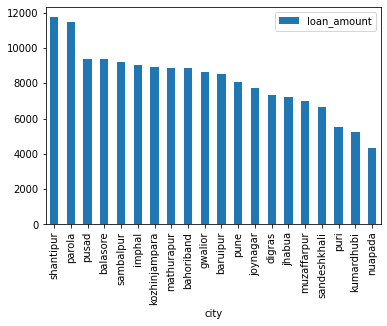

In [ ]:
city_data[['loan_amount']].sort_values('loan_amount',ascending=False).plot(kind= 'bar')

On Average - not much difference between the categories so simple reduction of categories techniques will not work here

### Social Class

In [ ]:
cat_data['social_class'] = cat_data['social_class'].str.lower()
cat_data['social_class'] = cat_data['social_class'].str.strip()

In [ ]:
sc_list = ['sc','s c','scheduled caste','scheduled tribe','harijan_sc','hindu_sc','mahar(sc)','adi karnataka (sc)',
           'scedelt cast','schduled cast','schudle cast','chambhar-sc','stsc','schedule caste','s.c','s.c.','s.c.',
           's.e.b.c','hindu_sc','g.c','a.c','b.c.','gc','bc','mahar','okkaliga','vokkaliga','sechudle caste',
           'kuruba','chambhar','chamar','lingayat']
obc_list = ['obc','o','o b c','o.b.c','o.b.c.','ogc','obc`','o p n','oc','hindu_obc','maratha',
            'mbc','matang','bce','ujnt','v.j.n.t.','nt','vjnt','n.t.']
st_list = ['st','st gond','s.t.','scheduled tribe','s.t','s.s','st(harijan)','sebc','sechudle tribe',
           'sechudle tripe','s. t.','stsc','stc','nayaka',]
other_list = ['45','42','9','2nd','27','23','48','48000','open','s','m','unknown','Unknown']
hindu_list = ['hindu','hindu_ezhava','hindu, kuruba','hindu, waddar','lingahitha','ezhava','24 telugashetty','Telgu','shetty','upparashetty',
              'upparshetty','uppar sheety','shetty','hindhu']
general_list = ['general','gen','gen- bpl','genl','genral','generalh','general caste',
                'genetal','genarel cast','genaral','genarel','genrel','gen.','grn.','g.s']
minority_list = ['minority', 'minority comunity', 'minorty','christian','muslim','musilim',
                 'mushlim','muslin','mulim','musilm','muslimm','christian','bauddha','mynority','mynirity',
                 'islam','minerity']

In [ ]:
# cast_dict = {'sc_list' : ['sc','s c','scheduled caste','scheduled tribe','harijan_sc','hindu_sc','mahar(sc)',
#                           'adi karnataka (sc)','scedelt cast','schduled cast','schudle cast','chambhar-sc','stsc',
#                           'schedule caste','s.c','s.c.','s.c.','s.e.b.c','hindu_sc','gc'],
#              'other_list' : ['45','42','9','2nd','27','23','48','48000','s','m'],
#             'ts_list' : ['24 telugashetty','Telgu',],
#             'hindu_list' : ['hindu','hindu_ezhava','hindu, kuruba','hindu, waddar'],
#             'muslim_list' : ['muslim','musilim','mushlim','muslin','mulim','musilm','muslimm'],
#             'general_list' : ['general','gen','gen- bpl','genl','genral','generalh','general caste',
#                               'genetal','genarel cast','genaral','genarel','genrel','gen.']
#              }

In [ ]:
cat_data['social_class_1'] = np.where(cat_data['social_class'].isin(sc_list),'sc',cat_data['social_class'])
cat_data['social_class_2'] = np.where(cat_data['social_class_1'].isin(obc_list),'obc',cat_data['social_class_1'])
cat_data['social_class_3'] = np.where(cat_data['social_class_2'].isin(st_list),'st',cat_data['social_class_2'])
cat_data['social_class_4'] = np.where(cat_data['social_class_3'].isin(other_list),'unknown',cat_data['social_class_3'])
cat_data['social_class_6'] = np.where(cat_data['social_class_4'].isin(hindu_list),'hindu',cat_data['social_class_4'])
cat_data['social_class_8'] = np.where(cat_data['social_class_6'].isin(general_list),'general',cat_data['social_class_6'])
cat_data['social_class_9'] = np.where(cat_data['social_class_8'].isin(minority_list),'minority',cat_data['social_class_8'])

In [ ]:
cat_data['social_class_9'].value_counts().nlargest(10)

obc            12442
sc              8960
general         3784
minority        3632
st              3127
hindu           1317
unknown          281
nuniya            30
vishwakarma       26
mm                23
Name: social_class_9, dtype: int64

In [ ]:
cat_data['social_class_old'] = cat_data['social_class']
cat_data['social_class'] = cat_data['social_class_9']

In [ ]:
print(cat_data.social_class.unique()[:10])
print(cat_data.social_class.nunique())

['mochi' 'obc' 'nai' 'muchi' 'kusbaha' 'rajput' 'gorai' 'bouri' 'nil' 'sc']
349


#### Missing Value Treatment

In [ ]:
imputer = SimpleImputer(missing_values = np.nan,strategy ='constant',fill_value = 'Unknown')
cat_data['social_class'] = imputer.fit_transform(cat_data[['social_class']].copy()).ravel()

In [ ]:
def caste_Fix(col):
    if col == 'obc':
        return 'obc'
    elif col == 'sc' or col ==  'st':
        return 'lower caste'
    elif col ==  'general' or col ==  'hindu':
        return 'general'
    elif col ==  'minority':
        return 'minority'
    else:
        return 'other caste'

In [ ]:
cat_data['social_class_enc'] = cat_data[['social_class']].apply(lambda x: caste_Fix(x['social_class']), axis=1)

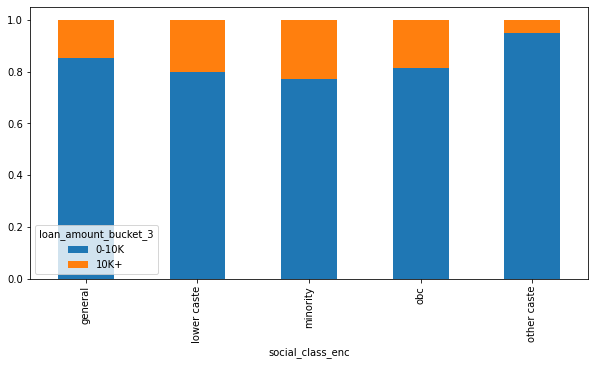

In [ ]:
data = pd.crosstab(cat_data['social_class_enc'], cat_data['loan_amount_bucket_3']);
data.div(data.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, figsize = (10, 5));

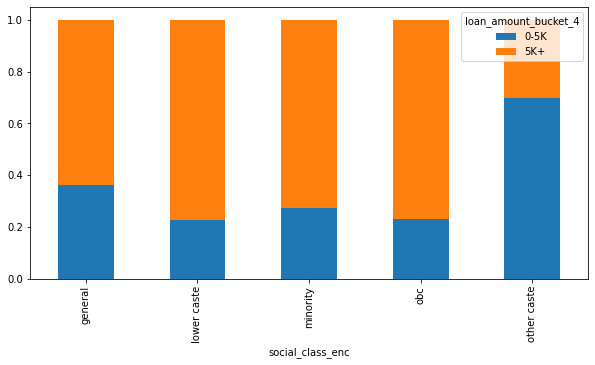

In [ ]:
data = pd.crosstab(cat_data['social_class_enc'], cat_data['loan_amount_bucket_4']);
data.div(data.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, figsize = (10, 5));

#### Label Encoding

In [ ]:
cat_data['social_class_label_enc'] = le.fit_transform(cat_data['social_class_enc'])

In [ ]:
cat_data['social_class_label_enc'].value_counts(dropna=False)

3    12442
1    12087
4     6738
0     5101
2     3632
Name: social_class_label_enc, dtype: int64

### Primary Business

In [ ]:
cat_data['primary_business'] = cat_data['primary_business'].str.lower()
cat_data['primary_business'] = cat_data['primary_business'].str.strip()

In [ ]:
print(cat_data.primary_business.unique()[:10])
print(cat_data.primary_business.nunique())

['tailoring' 'beauty salon' 'general store' 'puffed rice business'
 'poultry farm' 'tea stall' 'cow rearing' 'vegetable vendor'
 'banana cultivation' 'utensils selling']
418


In [ ]:
cat_data.primary_business.value_counts(dropna=False).sort_values(ascending = False).head(20)

tailoring                3971
goat rearing             2268
cow rearing              2080
handloom work            2068
vegetable cultivation    1704
grocery store            1369
school                   1332
milk business            1317
vegetable vendor         1174
weaver                   1157
saree business           1000
embroidery work           942
fish rearing              735
poultry farm              726
rice business             678
general store             661
cloth business            609
paddy cultivation         594
education loan            557
buffalo rearing           500
Name: primary_business, dtype: int64

#### Missing Value Treatment

In [ ]:
cat_data.primary_business.isnull().sum()

26

In [ ]:
imputer = SimpleImputer(missing_values = np.nan,strategy ='most_frequent')
cat_data['primary_business'] = imputer.fit_transform(cat_data[['primary_business']].copy()).ravel()

#### Bi-variate Analysis

In [ ]:
primary_business = cat_data[['loan_amount','Id','primary_business']].groupby('primary_business').agg({'loan_amount':'mean',
                                                                                                      'Id':'count'}).sort_values('Id',ascending = False)
primary_business_data = primary_business.head(20).reset_index()
primary_business_data.set_index('primary_business',inplace=True)

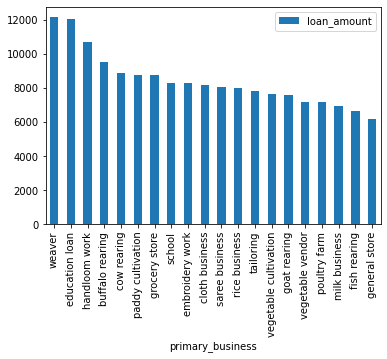

In [ ]:
primary_business_data[['loan_amount']].sort_values('loan_amount',ascending=False).plot(kind= 'bar')

On Average - not much difference between the categories so simple reduction of categories techniques will not work here

### Secondary Business

In [ ]:
cat_data['secondary_business'] = cat_data['secondary_business'].str.lower()
cat_data['secondary_business'] = cat_data['secondary_business'].str.strip()

In [ ]:
print(cat_data.secondary_business.unique()[:10])
print(cat_data.secondary_business.nunique())

['others' 'none' 'agriculture' 'daily wage labourer' 'livestock rearing'
 nan]
5


In [ ]:
cat_data.secondary_business.value_counts(dropna=False).sort_values(ascending = False).head(20)

none                   27366
NaN                     5241
others                  2564
daily wage labourer     2545
agriculture             2105
livestock rearing        179
Name: secondary_business, dtype: int64

#### Missing Value Treatment

In [ ]:
imputer = SimpleImputer(missing_values = np.nan,strategy ='constant',fill_value = 'Unknown')
cat_data['secondary_business'] = imputer.fit_transform(cat_data[['secondary_business']].copy()).ravel()
cat_data['secondary_business'] = np.where(cat_data['secondary_business'] == 'none', 'Unknown', cat_data['secondary_business'])

#### Label Encoding

In [ ]:
cat_data['secondary_business_label_enc'] = le.fit_transform(cat_data['secondary_business'])

#### Bivariate Analysis

In [ ]:
cols = ['loan_amount_bucket_2','loan_amount_bucket_3','loan_amount_bucket_4']

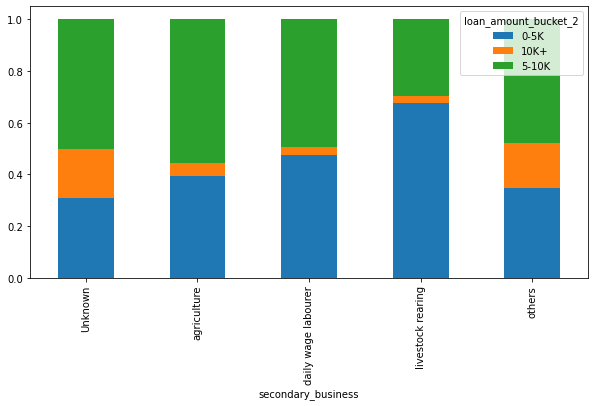

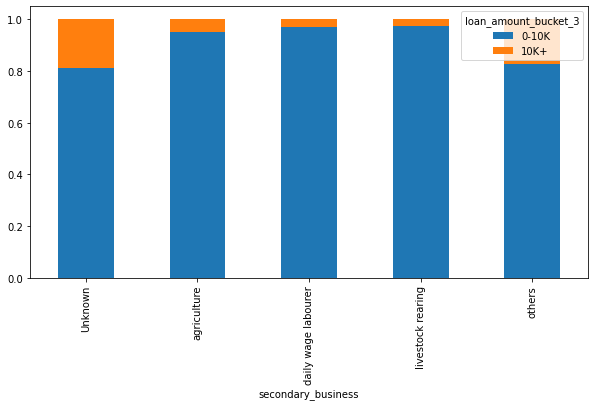

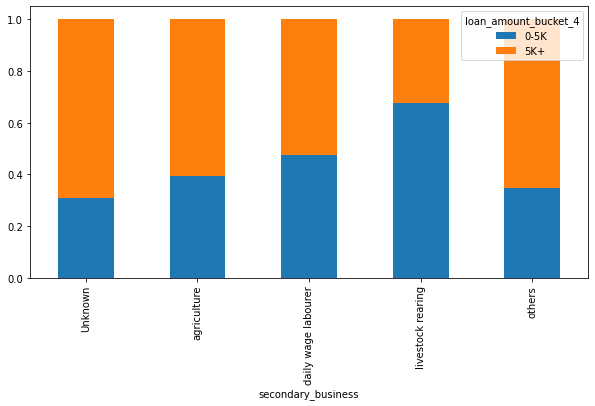

In [ ]:
for col in cols:
    data = pd.crosstab(cat_data['secondary_business'], cat_data[col]);
    data.div(data.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, figsize = (10, 5));

### Loan Purpose

In [ ]:
cat_data['loan_purpose'] = cat_data['loan_purpose'].str.lower()
cat_data['loan_purpose'] = cat_data['loan_purpose'].str.strip()

In [ ]:
print(cat_data.loan_purpose.unique())
print(cat_data.loan_purpose.nunique())

['apparels' 'beauty salon' 'retail store' 'eateries' 'meat businesses'
 'animal husbandry' 'agro based businesses' 'farming/ agriculture'
 'retail sale' 'carpentery work' 'construction related activities'
 'business services - ii' 'tobacco related activities' 'repair services'
 'laundry services' 'food items' 'handicrafts' 'business services - i'
 'transportation services' 'flower business' 'artifical jewellry selling'
 'jewellry shop' 'agarbatti business' 'miscellaneous' 'education loan'
 'recycling/ waste management' 'tuition centre' 'utensil selling'
 'cyber caf_' 'others' nan 'training' 'professional' 'cable tv services'
 'vocational loans' 'tent services' 'sanitation' 'manufacturing']
37


In [ ]:
cat_data.loan_purpose.value_counts(dropna=False).sort_values(ascending = False).head(40)

apparels                           7064
agro based businesses              4729
animal husbandry                   4421
meat businesses                    4302
handicrafts                        4230
farming/ agriculture               3284
education loan                     2100
retail store                       1963
eateries                           1831
business services - ii              854
tobacco related activities          853
construction related activities     661
retail sale                         614
artifical jewellry selling          556
carpentery work                     299
food items                          285
business services - i               276
transportation services             245
flower business                     238
beauty salon                        204
repair services                     192
laundry services                    162
agarbatti business                  107
utensil selling                     104
sanitation                          101


#### Missing Value Treatment

In [ ]:
imputer = SimpleImputer(missing_values = np.nan,strategy ='most_frequent')
cat_data['loan_purpose'] = imputer.fit_transform(cat_data[['loan_purpose']].copy()).ravel()

#### Label Encoding

In [ ]:
cat_data['loan_purpose_label_enc'] = le.fit_transform(cat_data['loan_purpose'])

#### Bivariate Analysis

In [ ]:
cols = ['loan_amount_bucket_2','loan_amount_bucket_3','loan_amount_bucket_4']

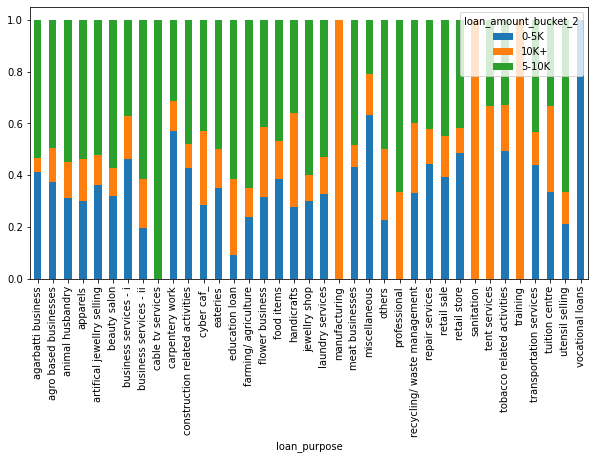

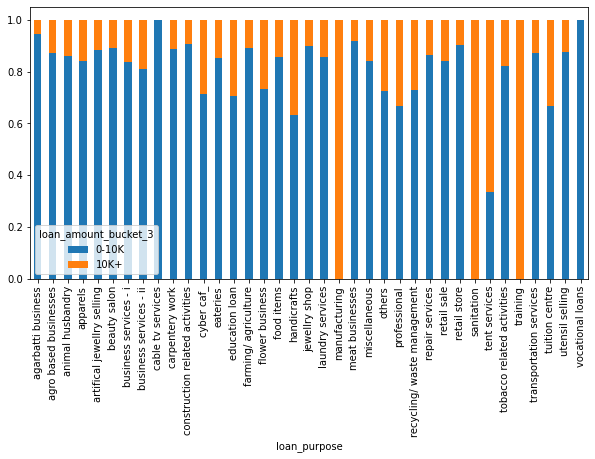

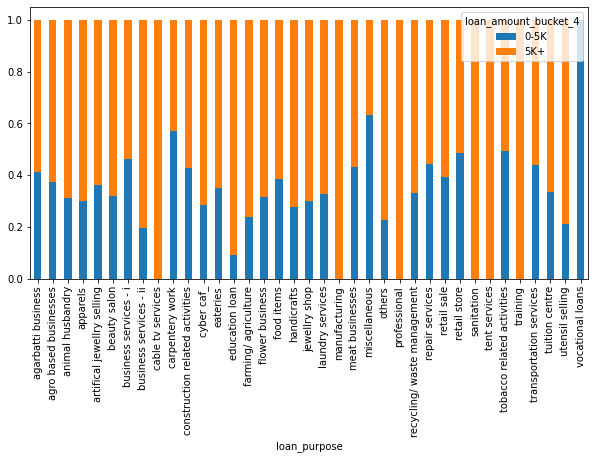

In [ ]:
for col in cols:
    data = pd.crosstab(cat_data['loan_purpose'], cat_data[col]);
    data.div(data.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, figsize = (10, 5));

### Sex

In [ ]:
cat_data['sex'] = cat_data['sex'].str.lower()
cat_data['sex'] = cat_data['sex'].str.strip()

In [ ]:
print(cat_data.sex.unique())
print(cat_data.sex.nunique())

['f' 'm' 'tg']
3


In [ ]:
cat_data.sex.value_counts(dropna=False).sort_values(ascending = False).head(40)

f     37622
m      2371
tg        7
Name: sex, dtype: int64

In [ ]:
cat_data['sex'] = np.where(cat_data['sex'] == 'tg', 'm', cat_data['sex'])

In [ ]:
cat_data.sex.value_counts(dropna=False).sort_values(ascending = False)

f    37622
m     2378
Name: sex, dtype: int64

#### Bi-variate Analysis

In [ ]:
cols = ['loan_amount_bucket_2','loan_amount_bucket_3','loan_amount_bucket_4']

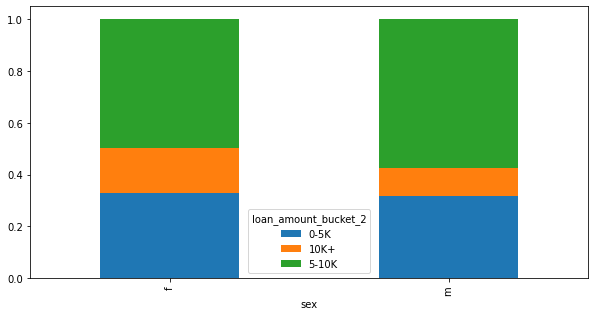

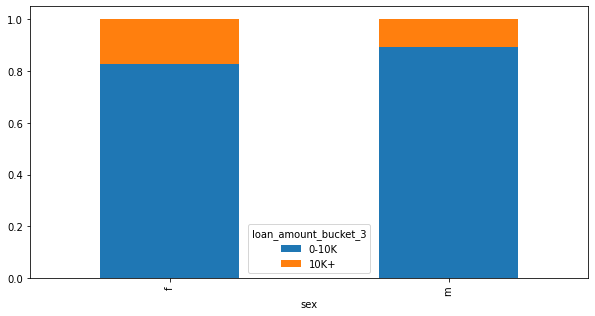

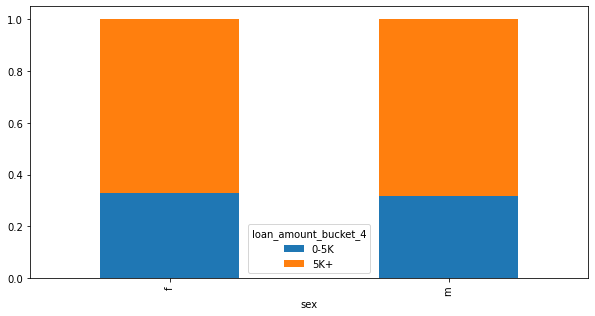

In [ ]:
for col in cols:
    data = pd.crosstab(cat_data['sex'], cat_data[col]);
    data.div(data.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, figsize = (10, 5));

#### Label Encoding

In [ ]:
cat_data['sex_label_enc'] = le.fit_transform(cat_data['sex'])

### Type of House

In [ ]:
cat_data['type_of_house'] = cat_data['type_of_house'].str.lower()
cat_data['type_of_house'] = cat_data['type_of_house'].str.strip()

In [ ]:
print(cat_data.type_of_house.unique())
print(cat_data.type_of_house.nunique())

['r' 't1' 't2' nan]
3


In [ ]:
cat_data.type_of_house.value_counts(dropna=False).sort_values(ascending = False).head(40)

t2     17715
t1     15092
r       6499
NaN      694
Name: type_of_house, dtype: int64

#### Missing Value Treatment

In [ ]:
imputer = SimpleImputer(missing_values = np.nan,strategy ='constant',fill_value = 'Unknown')
cat_data['type_of_house'] = imputer.fit_transform(cat_data[['type_of_house']].copy()).ravel()

#### Label Encoding

In [ ]:
cat_data['type_of_house_label_enc'] = le.fit_transform(cat_data['type_of_house'])

# Combining Categorical and Numerical Features

In [ ]:
cat_data.columns

Index(['city', 'sex', 'social_class', 'primary_business', 'secondary_business',
       'type_of_house', 'loan_purpose', 'old_dependents', 'young_dependents',
       'home_ownership', 'occupants_count', 'sanitary_availability',
       'water_availabity', 'Id', 'loan_amount', 'loan_amount_bucket_1',
       'loan_amount_bucket_2', 'loan_amount_bucket_3', 'loan_amount_bucket_4',
       'social_class_1', 'social_class_2', 'social_class_3', 'social_class_4',
       'social_class_6', 'social_class_8', 'social_class_9',
       'social_class_old', 'social_class_enc', 'social_class_label_enc',
       'secondary_business_label_enc', 'loan_purpose_label_enc',
       'sex_label_enc', 'type_of_house_label_enc'],
      dtype='object')

In [ ]:
cat_data.head()

,city,sex,social_class,primary_business,secondary_business,type_of_house,loan_purpose,old_dependents,young_dependents,home_ownership,occupants_count,sanitary_availability,water_availabity,Id,loan_amount,loan_amount_bucket_1,loan_amount_bucket_2,loan_amount_bucket_3,loan_amount_bucket_4,social_class_1,social_class_2,social_class_3,social_class_4,social_class_6,social_class_8,social_class_9,social_class_old,social_class_enc,social_class_label_enc,secondary_business_label_enc,loan_purpose_label_enc,sex_label_enc,type_of_house_label_enc
0,dhanbad,f,mochi,tailoring,others,r,apparels,0,2,1.00,4,1.00,0.50,1,5000.00,0-5K,0-5K,0-10K,0-5K,mochi,mochi,mochi,mochi,mochi,mochi,mochi,mochi,other caste,4,4,3,0,1
1,manjapra,f,obc,tailoring,Unknown,t1,apparels,1,1,1.00,4,1.00,0.50,2,7500.00,5-10K,5-10K,0-10K,5K+,obc,obc,obc,obc,obc,obc,obc,obc,obc,3,0,3,0,2
2,dhanbad,m,nai,beauty salon,others,t1,beauty salon,0,2,1.00,4,1.00,0.50,3,5000.00,0-5K,0-5K,0-10K,0-5K,nai,nai,nai,nai,nai,nai,nai,nai,other caste,4,4,5,1,2
3,pusad,f,obc,tailoring,Unknown,t1,apparels,0,2,1.00,5,1.00,0.50,4,7500.00,5-10K,5-10K,0-10K,5K+,obc,obc,obc,obc,obc,obc,obc,obc,obc,3,0,3,0,2
4,nuapada,f,obc,general store,agriculture,t1,retail store,0,0,1.00,1,1.00,0.50,5,5000.00,0-5K,0-5K,0-10K,0-5K,obc,obc,obc,obc,obc,obc,obc,obc,obc,3,1,28,0,2


## **Missing Value treatment for rest of the features**

In [ ]:
cat_data['home_ownership'].value_counts(dropna=False)

1.00    38531
0.00     1090
nan       379
Name: home_ownership, dtype: int64

In [ ]:
cat_data['sanitary_availability'].value_counts(dropna=False)

1.00     27313
0.00     12478
nan        208
-1.00        1
Name: sanitary_availability, dtype: int64

In [ ]:
cat_data['water_availabity'].value_counts(dropna=False)

1.00     17782
0.50     16782
nan       5253
0.00       182
-1.00        1
Name: water_availabity, dtype: int64

In [ ]:
imputer = SimpleImputer(missing_values = np.nan,strategy ='most_frequent')
cat_data['home_ownership'] = imputer.fit_transform(cat_data[['home_ownership']].copy()).ravel()
cat_data['sanitary_availability'] = imputer.fit_transform(cat_data[['sanitary_availability']].copy()).ravel()

In [ ]:
imputer = SimpleImputer(missing_values = np.nan,strategy ='constant',fill_value = 0.0)
cat_data['water_availabity'] = imputer.fit_transform(cat_data[['water_availabity']].copy()).ravel()

In [ ]:
cat_data['sanitary_availability'] = np.where(cat_data['sanitary_availability'] == -1.0, 0.0, cat_data['sanitary_availability'])
cat_data['water_availabity'] = np.where(cat_data['water_availabity'] == -1.0, 0.0, cat_data['water_availabity'])

In [ ]:
cat_data.isnull().sum()

city                               0
sex                                0
social_class                       0
primary_business                   0
secondary_business                 0
type_of_house                      0
loan_purpose                       0
old_dependents                     0
young_dependents                   0
home_ownership                     0
occupants_count                    0
sanitary_availability              0
water_availabity                   0
Id                                 0
loan_amount                        0
loan_amount_bucket_1               0
loan_amount_bucket_2               0
loan_amount_bucket_3               0
loan_amount_bucket_4               0
social_class_1                  5255
social_class_2                  5255
social_class_3                  5255
social_class_4                  5255
social_class_6                  5255
social_class_8                  5255
social_class_9                  5255
social_class_old                5255
s

In [ ]:
Final_df = pd.concat([data_df[['Id','loan_amount']],
                     num_data[['loan_installments_bucket_label_enc', 'loan_tenure_bucket_label_enc',
                               'Age_bucket_label_enc', 'monthly_expenses_bucket_label_enc',
                               'annual_income_bucket_label_enc', 'house_area_bucket_label_enc',
                               'loan_amount_bucket_3_label_enc']],
                     cat_data[['city','primary_business','sex_label_enc',
                               'secondary_business_label_enc','type_of_house_label_enc','loan_purpose_label_enc',
                               'social_class_label_enc','old_dependents','young_dependents','home_ownership',
                               'occupants_count','sanitary_availability','water_availabity']]],axis=1)

In [ ]:
Final_df.head()

,Id,loan_amount,loan_installments_bucket_label_enc,loan_tenure_bucket_label_enc,Age_bucket_label_enc,monthly_expenses_bucket_label_enc,annual_income_bucket_label_enc,house_area_bucket_label_enc,loan_amount_bucket_3_label_enc,city,primary_business,sex_label_enc,secondary_business_label_enc,type_of_house_label_enc,loan_purpose_label_enc,social_class_label_enc,old_dependents,young_dependents,home_ownership,occupants_count,sanitary_availability,water_availabity
0,1,5000.00,0,0,0,1,3,1,0,dhanbad,tailoring,0,4,1,3,4,0,2,1.00,4,1.00,0.50
1,2,7500.00,1,0,0,1,5,1,0,manjapra,tailoring,0,0,2,3,3,1,1,1.00,4,1.00,0.50
2,3,5000.00,0,0,0,1,3,1,0,dhanbad,beauty salon,1,4,2,5,4,0,2,1.00,4,1.00,0.50
3,4,7500.00,1,0,1,1,1,1,0,pusad,tailoring,0,0,2,3,3,0,2,1.00,5,1.00,0.50
4,5,5000.00,0,0,0,1,3,1,0,nuapada,general store,0,1,2,28,3,0,0,1.00,1,1.00,0.50


In [ ]:
Final_df.isnull().sum()

Id                                    0
loan_amount                           0
loan_installments_bucket_label_enc    0
loan_tenure_bucket_label_enc          0
Age_bucket_label_enc                  0
monthly_expenses_bucket_label_enc     0
annual_income_bucket_label_enc        0
house_area_bucket_label_enc           0
loan_amount_bucket_3_label_enc        0
city                                  0
primary_business                      0
sex_label_enc                         0
secondary_business_label_enc          0
type_of_house_label_enc               0
loan_purpose_label_enc                0
social_class_label_enc                0
old_dependents                        0
young_dependents                      0
home_ownership                        0
occupants_count                       0
sanitary_availability                 0
water_availabity                      0
dtype: int64

In [ ]:
Final_df.shape

(40000, 22)

In [ ]:
X = Final_df.drop(['loan_amount_bucket_3_label_enc'],axis = 1)
y = Final_df['loan_amount_bucket_3_label_enc']

# Train - Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify = y ,random_state = 1)

## Target - Mean Encoding

**for categorical features like - city, primary business and Social Class**

### City

In [ ]:
def city_loan(loans,city):
    if (loans >= 50000):
        return 'Very_High_loan_amt_app_cities'
    elif (loans >= 15000 and loans < 50000):
        return 'High_Loan_amt_app_cities'
    elif (loans >= 10000 and loans < 15000):
        return 'Mid_Loan_amt_app_cities'
    elif (loans >= 5000 and loans < 10000):
        return 'Low_Loan_amt_app_cities'
    elif (loans >= 0 and loans < 5000):
        return 'Day_2_Day_loans'
    else:
        return 'Unknown'

In [ ]:
X_train['City_Loan_App'] = X_train[['loan_amount','city']].apply(lambda x: city_loan(x['loan_amount'],x['city']), axis=1)

In [ ]:
city_loan_data = X_train[['loan_amount','Id','city','City_Loan_App']].groupby(['city','City_Loan_App']).agg({'loan_amount':'mean',
                                                           'Id':'count'}).sort_values(['City_Loan_App','Id'],ascending = False).reset_index()

In [ ]:
city_loan_data.head()

,city,City_Loan_App,loan_amount,Id
0,hubli,Very_High_loan_amt_app_cities,105125.00,8
1,pusad,Very_High_loan_amt_app_cities,309760.00,5
2,limdi,Very_High_loan_amt_app_cities,50000.00,3
3,panvel,Very_High_loan_amt_app_cities,50000.00,3
4,thakurpukur,Very_High_loan_amt_app_cities,451500.00,2


In [ ]:
def city_Fix(city):
    if city == 'hubli':
        return 'hubli'
    elif city == 'shimoga':
        return  'shimoga'
    elif city == 'ranjani':
        return  'ranjani'
    elif city == 'thakurpukur':
        return  'thakurpukur'
    elif city == 'bahadarpur':
        return  'bahadarpur'
    elif city == 'shantipur':
        return  'shantipur'
    elif city == 'parola':
        return  'parola'
    elif city == 'kozhinjampara':
        return  'kozhinjampara'
    elif city == 'imphal':
        return  'imphal'
    elif city == 'mathurapur':
        return  'mathurapur'
    elif city == 'balasore':
        return  'balasore'
    elif city == 'sambalpur':
        return  'sambalpur'
    elif city == 'pusad':
        return  'pusad'
    elif city == 'gwalior':
        return  'gwalior'
    elif city == 'sandeshkhali':
        return  'sandeshkhali'
    elif city == 'bahoriband':
        return  'bahoriband'
    elif city == 'muzaffarpur':
        return  'muzaffarpur'
    elif city == 'pune':
        return  'pune'
    elif city == 'nuapada':
        return  'nuapada'
    elif city == 'joynagar':
        return  'joynagar'
    else:
        return 'other cities'

In [ ]:
X_train['city_trgt_enc'] = X_train[['city']].apply(lambda x: city_Fix(x['city']), axis=1)

In [ ]:
X_train['city_trgt_enc'].value_counts().reset_index()

,index,city_trgt_enc
0,other cities,11516
1,pusad,4745
2,shantipur,1567
3,bahoriband,1370
4,imphal,1223
5,gwalior,1074
6,mathurapur,957
7,sandeshkhali,835
8,joynagar,727
9,muzaffarpur,687


#### Label Encoding

In [ ]:
X_train['city_trgt_label_enc'] = le.fit_transform(X_train['city_trgt_enc'])

#### City fix on the test data

In [ ]:
X_test['city_trgt_enc'] = X_test[['city']].apply(lambda x: city_Fix(x['city']), axis=1)

In [ ]:
X_test['city_trgt_label_enc'] = le.transform(X_test['city_trgt_enc'])

### Primary Business

In [ ]:
X_train.primary_business.nunique()

367

In [ ]:
def primary_busn_loan(loans,primary_business):
    if (loans >= 50000):
        return 'Very_High_loan_amt_app_pb'
    elif (loans >= 15000 and loans < 50000):
        return 'High_Loan_amt_app_pb'
    elif (loans >= 10000 and loans < 15000):
        return 'Mid_Loan_amt_app_pb'
    elif (loans >= 5000 and loans < 10000):
        return 'Low_Loan_amt_app_pb'
    elif (loans >= 0 and loans < 5000):
        return 'Day_2_Day_loans'
    else:
        return 'Unknown'

In [ ]:
X_train['primary_busn_Loan'] = X_train[['loan_amount','primary_business']].apply(lambda x: primary_busn_loan(x['loan_amount'],x['primary_business']), axis=1)

In [ ]:
pb_loan_data = X_train[['loan_amount','Id','primary_business','primary_busn_Loan']].groupby(['primary_business','primary_busn_Loan']).agg({'loan_amount':'mean',
                                                           'Id':'count'}).sort_values(['primary_busn_Loan','Id'],ascending = False).reset_index()

In [ ]:
pb_loan_data.primary_busn_Loan.value_counts()

Low_Loan_amt_app_pb          315
Mid_Loan_amt_app_pb          217
High_Loan_amt_app_pb         139
Day_2_Day_loans               62
Very_High_loan_amt_app_pb     15
Name: primary_busn_Loan, dtype: int64

In [ ]:
pb_loan_data.head()

,primary_business,primary_busn_Loan,loan_amount,Id
0,training,Very_High_loan_amt_app_pb,105125.00,8
1,education loan,Very_High_loan_amt_app_pb,60600.00,5
2,handloom work,Very_High_loan_amt_app_pb,50000.00,3
3,11th and 12th,Very_High_loan_amt_app_pb,50000.00,2
4,jute work,Very_High_loan_amt_app_pb,451500.00,2


In [ ]:
def primary_busn_Fix(col):
    if col ==  'training':
        return 'training'
    elif col ==  'education loan':
        return 'education loan'
    elif col ==  'handloom work':
        return 'handloom work'
    elif col ==  'weaver':
        return 'weaver'
    elif col ==  '11th and 12th':
        return '11th and 12th'
    elif col ==  'collective of small farmers from tribal commun...':
        return 'collective of small farmers from tribal commun...'
    elif col ==  'fabrication':
        return 'fabrication'
    elif col ==  'jute work':
        return 'jute work'
    elif col ==  'manufacturing unit':
        return 'manufacturing unit'
    elif col ==  'community organization':
        return 'community organization'
    elif col ==  'artisan':
        return 'artisan'
    elif col ==  'daily waste collection centre':
        return 'daily waste collection centre'
    elif col ==  'dry waste management':
        return  'dry waste management'
    elif col ==  'papad business':
        return  'papad business'
    elif col ==  'readymade garments':
        return  'readymade garments'
    elif col ==  'tailoring':
        return  'tailoring'
    elif col ==  'grocery store':
        return  'grocery store'
    elif col ==  'natural fiber crafts':
        return  'natural fiber crafts'
    elif col ==  'cow rearing':
        return  'cow rearing'
    elif col ==  'buffalo rearing':
        return  'buffalo rearing'
    elif col ==  'rice business':
        return  'rice business'
    elif col ==  'saree business':
        return  'saree business'
    elif col ==  'embroidery work':
        return  'embroidery work'
    elif col ==  'goat rearing':
        return  'goat rearing'
    elif col ==  'vegetable cultivation':
        return  'vegetable cultivation'
    elif col ==  'school':
        return  'school'
    elif col ==  'cash crops':
        return  'cash crops'
    elif col ==  'vegetable vendor':
        return  'vegetable vendor'
    elif col ==  'milk business':
        return  'milk business'
    elif col ==  'poultry farm':
        return  'poultry farm'
    elif col ==  'basket making business':
        return  'basket making business'
    elif col ==  'general store':
        return  'general store'
    elif col ==  'vocational loans':
        return  'vocational loans'
    else:
        return 'other purpose'

In [ ]:
X_train['primary_busn_enc'] = X_train[['primary_business']].apply(lambda x: primary_busn_Fix(x['primary_business']), axis=1)

In [ ]:
X_train['primary_busn_enc'].value_counts().reset_index().head(10)

,index,primary_busn_enc
0,other purpose,10657
1,tailoring,2783
2,goat rearing,1571
3,cow rearing,1457
4,handloom work,1424
5,vegetable cultivation,1186
6,school,947
7,grocery store,930
8,milk business,911
9,vegetable vendor,825


#### Label Encoding

In [ ]:
X_train['primary_busn_label_enc'] = le.fit_transform(X_train['primary_busn_enc'])

#### busn fix on the test data

In [ ]:
X_test['primary_busn_enc'] = X_test[['primary_business']].apply(lambda x: primary_busn_Fix(x['primary_business']), axis=1)

In [ ]:
X_test['primary_busn_label_enc'] = le.transform(X_test['primary_busn_enc'])

In [ ]:
X_test.head()

,Id,loan_amount,loan_installments_bucket_label_enc,loan_tenure_bucket_label_enc,Age_bucket_label_enc,monthly_expenses_bucket_label_enc,annual_income_bucket_label_enc,house_area_bucket_label_enc,city,primary_business,sex_label_enc,secondary_business_label_enc,type_of_house_label_enc,loan_purpose_label_enc,social_class_label_enc,old_dependents,young_dependents,home_ownership,occupants_count,sanitary_availability,water_availabity,city_trgt_enc,city_trgt_label_enc,primary_busn_enc,primary_busn_label_enc
37508,37509,12000.00,0,0,1,1,5,1,gwalior,tailoring,0,0,3,3,3,0,1,1.00,3,1.00,1.00,gwalior,3,tailoring,27
1354,1355,5000.00,0,0,1,1,3,2,kuju,goat rearing,0,0,2,21,1,0,2,1.00,2,1.00,0.50,other cities,11,goat rearing,13
12484,12485,5000.00,0,0,1,1,0,0,wadhwan,buffalo rearing,0,0,0,2,4,0,0,0.00,0,0.00,0.00,other cities,11,buffalo rearing,3
5304,5305,5000.00,0,0,1,1,2,1,nuapada,tailoring,0,0,2,3,4,0,2,1.00,1,1.00,0.50,nuapada,10,tailoring,27
7040,7041,5000.00,1,0,1,1,4,1,muzaffarpur,general store,0,0,3,28,3,0,0,1.00,4,1.00,0.50,muzaffarpur,9,general store,12


# Final Columns in Train and Test to build the Model

In [ ]:
final_cols = ['city_trgt_label_enc',
'Age_bucket_label_enc',
'sex_label_enc',
'social_class_label_enc',
'primary_busn_label_enc',
'secondary_business_label_enc',
'annual_income_bucket_label_enc',
'monthly_expenses_bucket_label_enc',
'old_dependents',
'young_dependents',
'home_ownership',
'type_of_house_label_enc',
'occupants_count',
'house_area_bucket_label_enc',
'sanitary_availability',
'water_availabity',
'loan_purpose_label_enc',
'loan_tenure_bucket_label_enc',
'loan_installments_bucket_label_enc']

In [ ]:
X_train_final = X_train[final_cols]

In [ ]:
X_train_final.columns

Index(['city_trgt_label_enc', 'Age_bucket_label_enc', 'sex_label_enc',
       'social_class_label_enc', 'primary_busn_label_enc',
       'secondary_business_label_enc', 'annual_income_bucket_label_enc',
       'monthly_expenses_bucket_label_enc', 'old_dependents',
       'young_dependents', 'home_ownership', 'type_of_house_label_enc',
       'occupants_count', 'house_area_bucket_label_enc',
       'sanitary_availability', 'water_availabity', 'loan_purpose_label_enc',
       'loan_tenure_bucket_label_enc', 'loan_installments_bucket_label_enc'],
      dtype='object')

In [ ]:
X_train_final.shape

(28000, 19)

In [ ]:
X_test_final = X_test[final_cols]
X_test_final.head()

,city_trgt_label_enc,Age_bucket_label_enc,sex_label_enc,social_class_label_enc,primary_busn_label_enc,secondary_business_label_enc,annual_income_bucket_label_enc,monthly_expenses_bucket_label_enc,old_dependents,young_dependents,home_ownership,type_of_house_label_enc,occupants_count,house_area_bucket_label_enc,sanitary_availability,water_availabity,loan_purpose_label_enc,loan_tenure_bucket_label_enc,loan_installments_bucket_label_enc
37508,3,1,0,3,27,0,5,1,0,1,1.00,3,3,1,1.00,1.00,3,0,0
1354,11,1,0,1,13,0,3,1,0,2,1.00,2,2,2,1.00,0.50,21,0,0
12484,11,1,0,4,3,0,0,1,0,0,0.00,0,0,0,0.00,0.00,2,0,0
5304,10,1,0,4,27,0,2,1,0,2,1.00,2,1,1,1.00,0.50,3,0,0
7040,9,1,0,3,12,0,4,1,0,0,1.00,3,4,1,1.00,0.50,28,0,1


In [ ]:
print("X_train shape", X_train_final.shape)
print("X_train shape", X_test_final.shape)
print("y_train shape", y_train.shape)
print("y_train shape", y_test.shape)

X_train shape (28000, 19)
X_train shape (12000, 19)
y_train shape (28000,)
y_train shape (12000,)


In [ ]:
X_train_final.to_csv("/content/drive/MyDrive/ML_Case_Study_Practice_Self/X_train_final.csv")
X_test_final.to_csv("/content/drive/MyDrive/ML_Case_Study_Practice_Self/X_test_final.csv")
y_train.to_csv("/content/drive/MyDrive/ML_Case_Study_Practice_Self/y_train.csv")
y_test.to_csv("/content/drive/MyDrive/ML_Case_Study_Practice_Self/y_test.csv")

# **Building Base Classifier - Random Forest**

In [ ]:
# To understand the differences of different random states affecting Out-of-Bag score
rf = RandomForestClassifier(random_state=1,oob_score=True)
rf.fit(X_train_final,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=1, verbose=0,
                       warm_start=False)

In [ ]:
print(rf.oob_score_)

0.8653214285714286


In [ ]:
y_train_predict = rf.predict(X_train_final)

## Trianing Accuracy

In [ ]:
rf.score(X_train_final,y_train)

0.9587857142857142

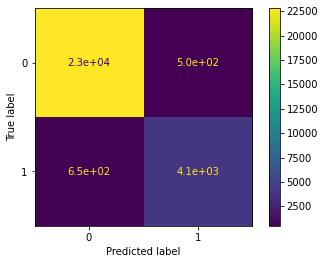

In [ ]:
plot_confusion_matrix(rf,X_train_final,y_train)

In [ ]:
print(classification_report(y_train,y_train_predict))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98     23288
           1       0.89      0.86      0.88      4712

    accuracy                           0.96     28000
   macro avg       0.93      0.92      0.93     28000
weighted avg       0.96      0.96      0.96     28000



## ROC Curve - Train Data

## Test Accuracy

In [ ]:
rf.score(X_test_final,y_test)

0.86875

In [ ]:
y_test_predict = rf.predict(X_test_final)

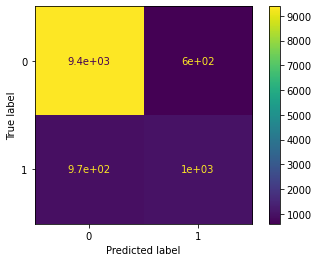

In [ ]:
print(plot_confusion_matrix(rf,X_test_final,y_test))

In [ ]:
print(classification_report(y_test,y_test_predict))

              precision    recall  f1-score   support

           0       0.91      0.94      0.92      9981
           1       0.63      0.52      0.57      2019

    accuracy                           0.87     12000
   macro avg       0.77      0.73      0.75     12000
weighted avg       0.86      0.87      0.86     12000



## ROC Curve - Test Data

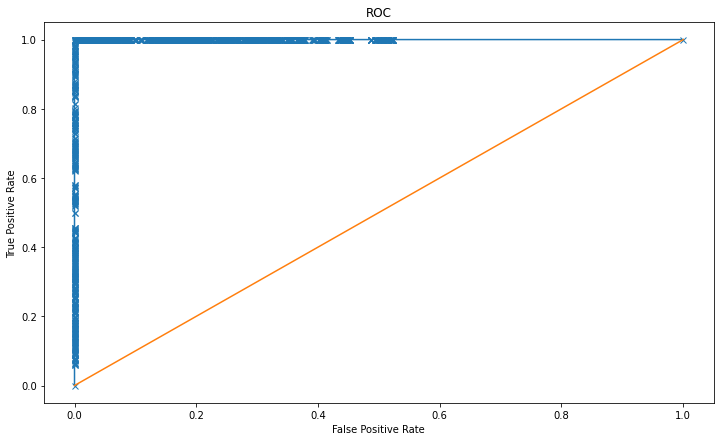

Area under Curve is 1.0


In [ ]:
rf_fpr, rf_tpr,_ = roc_curve(y_test_predict,rf.predict_proba(X_test_final)[:,1]) # keeping positive probs only
plt.figure(figsize=(12,7))
plt.plot(rf_fpr,rf_tpr, marker='x', label='Random Forest')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
cutoff = 0.5
# plt.text(0.015624763776551516,0.6416704445451878, f"Default-cutoff = {cutoff}", bbox={'facecolor': 'red','alpha':0.5})
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(y_test_predict,rf.predict_proba(X_test_final)[:,1]))

## **Hyperparameter Tuning - Random Forest**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

In [ ]:
n_estimators = [100,200,300]
max_depth = [5,10,15]
min_samples_split = [50,100,300]

In [ ]:
param_grid = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'min_samples_split':min_samples_split
    }
print(param_grid)

{'n_estimators': [100, 200, 300], 'max_depth': [5, 10, 15], 'min_samples_split': [50, 100, 300]}


In [ ]:
%%time
rfc1 = RandomForestClassifier()
rfc_randomized = RandomizedSearchCV(estimator=rfc1,
                                    param_distributions=param_grid,
                                    cv=5,
                                    verbose=True,
                                    n_jobs=4)

rfc_randomized.fit(X_train_final,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  1.7min
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:  1.8min finished


CPU times: user 4.52 s, sys: 174 ms, total: 4.7 s
Wall time: 1min 53s


In [ ]:
rfc_randomized.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### **Train Data Validation**

In [ ]:
rfc_randomized.score(X_train_final,y_train)

0.8681785714285715

In [ ]:
y_train_predict_rfc = rfc_randomized.predict(X_train_final)

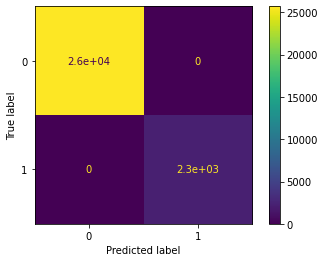

In [ ]:
print(plot_confusion_matrix(rfc_randomized,X_train_final,y_train_predict_rfc))

In [ ]:
print(classification_report(y_train,y_train_predict_rfc))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92     23288
           1       0.72      0.35      0.47      4712

    accuracy                           0.87     28000
   macro avg       0.80      0.66      0.70     28000
weighted avg       0.85      0.87      0.85     28000



### **Test Data Validation**

In [ ]:
rfc_randomized.score(X_test_final,y_test)

0.8683333333333333

In [ ]:
y_test_predict_rfc = rfc_randomized.predict(X_test_final)

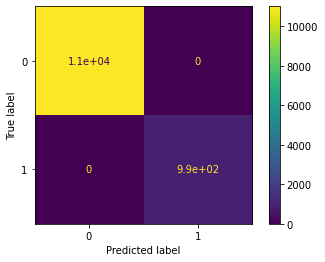

In [ ]:
print(plot_confusion_matrix(rfc_randomized,X_test_final,y_test_predict_rfc))

In [ ]:
print(classification_report(y_test,y_test_predict_rfc))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      9981
           1       0.72      0.35      0.47      2019

    accuracy                           0.87     12000
   macro avg       0.80      0.66      0.70     12000
weighted avg       0.85      0.87      0.85     12000



# **Classifier - XG Boost**

In [ ]:
# ! pip install xgboost
import xgboost as xgb
from xgboost import plot_importance

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# X_train_final = pd.read_csv('/content/drive/MyDrive/ML_Case_Study_Practice_Self/X_train_final.csv',index_col='Unnamed: 0')
# X_test_final = pd.read_csv('/content/drive/MyDrive/ML_Case_Study_Practice_Self/X_test_final.csv',index_col='Unnamed: 0')
# y_train = pd.read_csv('/content/drive/MyDrive/ML_Case_Study_Practice_Self/y_train.csv',index_col='Unnamed: 0')
# y_test = pd.read_csv('/content/drive/MyDrive/ML_Case_Study_Practice_Self/y_test.csv',index_col='Unnamed: 0')

## **Fitting the Base Model**

In [ ]:
xgb_cl = xgb.XGBClassifier(random_state=1)
# Fit
xgb_cl.fit(X_train_final, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
# Predict
y_pred_train = xgb_cl.predict(X_train_final)
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92     23288
           1       0.71      0.29      0.41      4712

    accuracy                           0.86     28000
   macro avg       0.79      0.63      0.67     28000
weighted avg       0.84      0.86      0.83     28000



In [ ]:
# Score
accuracy_score(y_train,y_pred_train)

0.8605357142857143

In [ ]:
# Predict
y_pred_test = xgb_cl.predict(X_test_final)
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      9981
           1       0.72      0.30      0.42      2019

    accuracy                           0.86     12000
   macro avg       0.80      0.64      0.67     12000
weighted avg       0.85      0.86      0.84     12000



In [ ]:
# Score
accuracy_score(y_test, y_pred_test)

0.8624166666666667

## **Hyperparameter Tuning with GridSearchCV**

### **General Approach for Parameter Tuning**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV


### **Tune n estimators and scale pos weight**



In [ ]:
params1 = {
    'n_estimators':range(5,200,20),
     'scale_pos_weight' : [1, 3, 5,7,10],
               }
params1 

{'n_estimators': range(5, 200, 20), 'scale_pos_weight': [1, 3, 5, 7, 10]}

In [ ]:
%%time
xgb1 = xgb.XGBClassifier(
 learning_rate = 0.1,
 max_depth = 5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 seed=27)

# Define the grid
grid = GridSearchCV(estimator=xgb1, 
                    param_grid = params1,
                    n_jobs=-1,
                    cv=5,
                    scoring = 'f1')

# Fit the grid
grid_result = grid.fit(X_train_final,y_train)

# report the best configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.617068 using {'n_estimators': 185, 'scale_pos_weight': 3}
CPU times: user 11.4 s, sys: 844 ms, total: 12.3 s
Wall time: 6min 53s


In [ ]:
grid_result_cv1_best = grid_result.best_estimator_
grid_result_cv1_best

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=185, n_jobs=1,
              nthread=4, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=3, seed=27,
              silent=None, subsample=0.8, verbosity=1)

### **Train Data Validation**

In [ ]:
# Prediction will be on test data
y_train_pred_xgb_gcv1 = grid_result_cv1_best.predict(X_train_final)
print(classification_report(y_train,y_train_pred_xgb_gcv1))

              precision    recall  f1-score   support

           0       0.96      0.86      0.91     23288
           1       0.55      0.82      0.66      4712

    accuracy                           0.86     28000
   macro avg       0.75      0.84      0.78     28000
weighted avg       0.89      0.86      0.87     28000



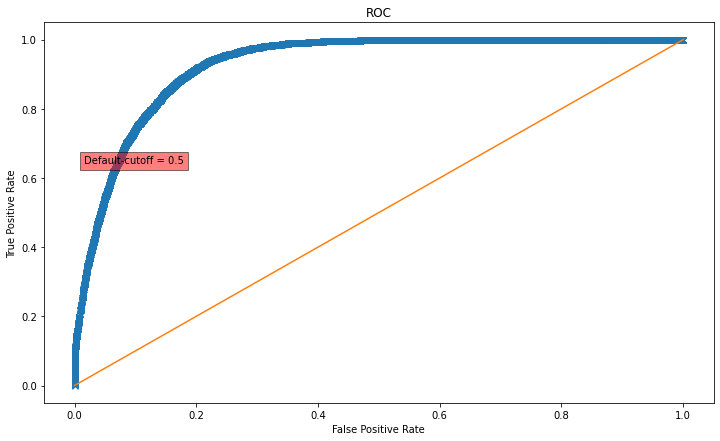

Area under Curve is 0.9275391774380184


In [ ]:
rf_fpr, rf_tpr,_ = roc_curve(y_train,grid_result_cv1_best.predict_proba(X_train_final)[:,1]) # keeping positive probs only
plt.figure(figsize=(12,7))
plt.plot(rf_fpr,rf_tpr, marker='x', label='XG Boost')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
cutoff = 0.5
# plt.text(0.015624763776551516,0.6416704445451878, f"Default-cutoff = {cutoff}", bbox={'facecolor': 'red','alpha':0.5})
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(y_train,grid_result_cv1_best.predict_proba(X_train_final)[:,1]))

### **Test Data Validation**

In [ ]:
# Prediction will be on test data
y_test_pred_xgb_gcv1 = grid_result_cv1_best.predict(X_test_final)
print(classification_report(y_test,y_test_pred_xgb_gcv1))

              precision    recall  f1-score   support

           0       0.95      0.86      0.90      9981
           1       0.52      0.78      0.62      2019

    accuracy                           0.84     12000
   macro avg       0.74      0.82      0.76     12000
weighted avg       0.88      0.84      0.85     12000



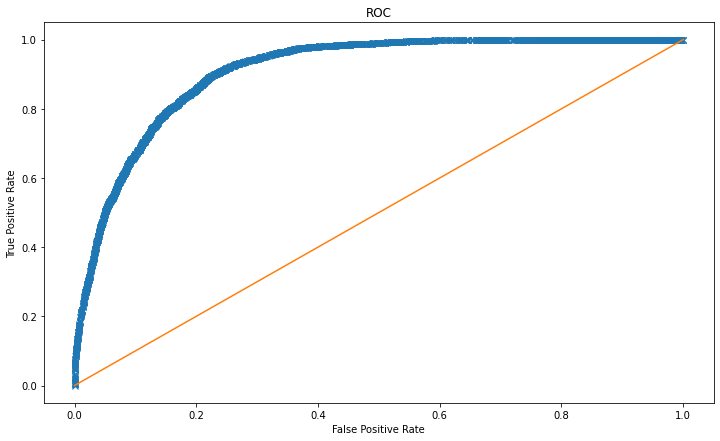

Area under Curve is 0.9082241896056197


In [ ]:
rf_fpr, rf_tpr,_ = roc_curve(y_test,grid_result_cv1_best.predict_proba(X_test_final)[:,1]) # keeping positive probs only
plt.figure(figsize=(12,7))
plt.plot(rf_fpr,rf_tpr, marker='x', label='XG Boost')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
cutoff = 0.5
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(y_test,grid_result_cv1_best.predict_proba(X_test_final)[:,1]))

### **Feature Importance**

In [ ]:
print(grid_result_cv1_best.feature_importances_)

[0.14358498 0.02718542 0.04167479 0.03818335 0.0357801  0.07357422
 0.07996354 0.02847747 0.01270815 0.02163272 0.02316849 0.03422746
 0.0594666  0.02860874 0.05118107 0.04308152 0.03340349 0.15949292
 0.06460505]


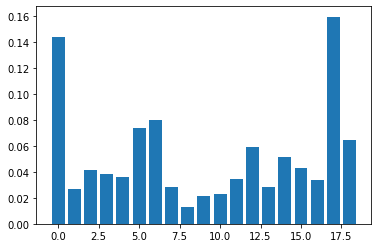

In [ ]:
plt.bar(range(len(grid_result_cv1_best.feature_importances_)), grid_result_cv1_best.feature_importances_)
plt.show()

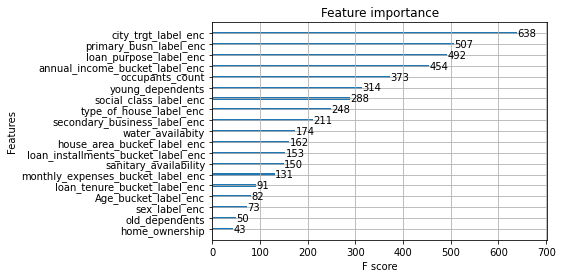

In [ ]:
# plot feature importance
plot_importance(grid_result_cv1_best)
plt.show();

### **Tune Max depth and min child weight**

In [ ]:
param_test2 = {
 'max_depth':[5,6,10],
 'min_child_weight':[3,4,5]
}
param_test2

{'max_depth': [5, 6, 10], 'min_child_weight': [3, 4, 5]}

In [ ]:
%%time
xgb2 = xgb.XGBClassifier(learning_rate =0.1,
              n_estimators = 185,
              gamma=0,
              subsample=0.8,
              colsample_bytree=0.8,
              objective= 'binary:logistic',
              nthread=4,
              min_child_weight = 4,
              scale_pos_weight=3,
              seed=27)

gsearch2 = GridSearchCV(estimator = xgb2, 
                        param_grid = param_test2,
                        scoring='f1',
                        n_jobs=4,
                        iid=False, 
                        cv=5)

# Fit the grid
grid_result = gsearch2.fit(X_train_final,y_train)

# report the best configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
grid_result_cv2_best = grid_result.best_estimator_

Best: 0.632295 using {'max_depth': 10, 'min_child_weight': 4}
CPU times: user 17.4 s, sys: 994 ms, total: 18.4 s
Wall time: 3min 41s


#### **Train Data Validation**

In [ ]:
# Prediction will be on test data
y_train_pred_xgb_gcv2 = grid_result_cv2_best.predict(X_train_final)
print(classification_report(y_train,y_train_pred_xgb_gcv2))

              precision    recall  f1-score   support

           0       0.98      0.90      0.94     23288
           1       0.66      0.93      0.77      4712

    accuracy                           0.91     28000
   macro avg       0.82      0.92      0.86     28000
weighted avg       0.93      0.91      0.91     28000



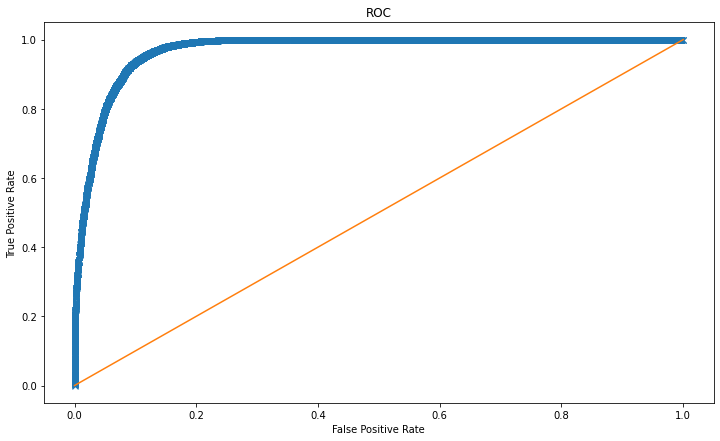

Area under Curve is 0.9693592740185784


In [ ]:
rf_fpr, rf_tpr,_ = roc_curve(y_train,grid_result_cv2_best.predict_proba(X_train_final)[:,1]) # keeping positive probs only
plt.figure(figsize=(12,7))
plt.plot(rf_fpr,rf_tpr, marker='x', label='XG Boost')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
cutoff = 0.5
# plt.text(0.015624763776551516,0.6416704445451878, f"Default-cutoff = {cutoff}", bbox={'facecolor': 'red','alpha':0.5})
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(y_train,grid_result_cv2_best.predict_proba(X_train_final)[:,1]))

#### **Test Data Validation**

In [ ]:
# Prediction will be on test data
y_test_pred_xgb_gcv2 = grid_result_cv2_best.predict(X_test_final)
print(classification_report(y_test,y_test_pred_xgb_gcv2))

              precision    recall  f1-score   support

           0       0.94      0.87      0.91      9981
           1       0.54      0.74      0.62      2019

    accuracy                           0.85     12000
   macro avg       0.74      0.81      0.77     12000
weighted avg       0.88      0.85      0.86     12000



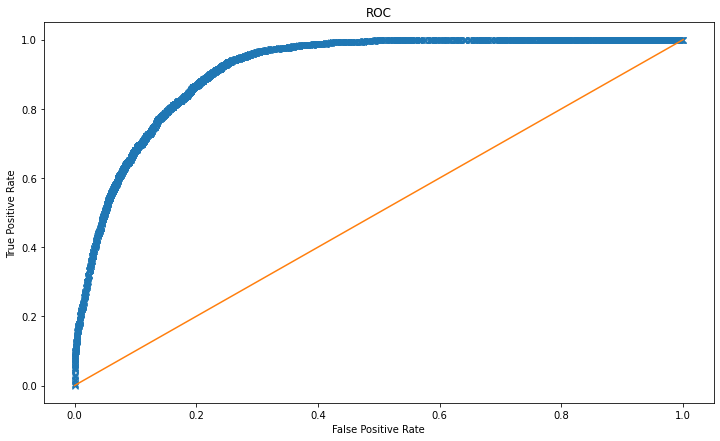

Area under Curve is 0.9132918915429162


In [ ]:
rf_fpr, rf_tpr,_ = roc_curve(y_test,grid_result_cv2_best.predict_proba(X_test_final)[:,1]) # keeping positive probs only
plt.figure(figsize=(12,7))
plt.plot(rf_fpr,rf_tpr, marker='x', label='XG Boost')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
cutoff = 0.5
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(y_test,grid_result_cv2_best.predict_proba(X_test_final)[:,1]))

#### **Feature Importance**

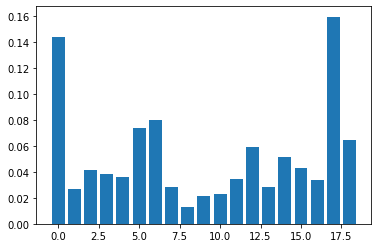

In [ ]:
plt.bar(range(len(grid_result_cv2_best.feature_importances_)), grid_result_cv1_best.feature_importances_)
plt.show()

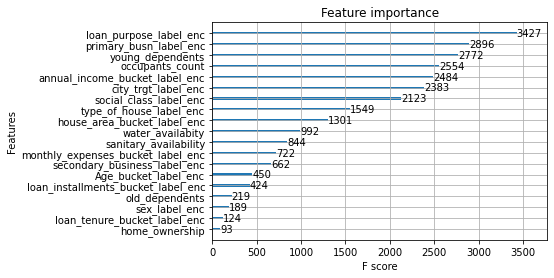

In [ ]:
# plot feature importance
plot_importance(grid_result_cv2_best)
plt.show();

### **Tune gama**

In [ ]:
param_test3 = {
#  'gamma':[i/10.0 for i in range(0,5)]
   'gamma':[0.1]
}
param_test3

{'gamma': [0.1]}

In [ ]:
%%time
xgb3 = xgb.XGBClassifier(learning_rate =0.1,
              n_estimators = 185,
              subsample=0.8,
              colsample_bytree=0.8,
              objective= 'binary:logistic',
              nthread=4,
              min_child_weight = 7,
              scale_pos_weight = 2, # increasing the weights a little bit to imporve the errors
              seed=27)

gsearch3 = GridSearchCV(estimator = xgb3, param_grid = param_test3,
                        scoring='f1',
                        n_jobs=4,
                        cv=5)

# Fit the grid
grid_result3 = gsearch3.fit(X_train_final,y_train)

# report the best configuration
print("Best: %f using %s" % (grid_result3.best_score_, grid_result3.best_params_))
grid_result_cv3_best = grid_result3.best_estimator_

Best: 0.545983 using {'gamma': 0.1}
CPU times: user 4.49 s, sys: 141 ms, total: 4.64 s
Wall time: 12.6 s


#### **Train Data Validation**

In [ ]:
# Prediction will be on test data
y_train_pred_xgb_gcv3 = grid_result_cv3_best.predict(X_train_final)
print(classification_report(y_train,y_train_pred_xgb_gcv3))

              precision    recall  f1-score   support

           0       0.91      0.92      0.91     23288
           1       0.57      0.54      0.56      4712

    accuracy                           0.86     28000
   macro avg       0.74      0.73      0.73     28000
weighted avg       0.85      0.86      0.85     28000



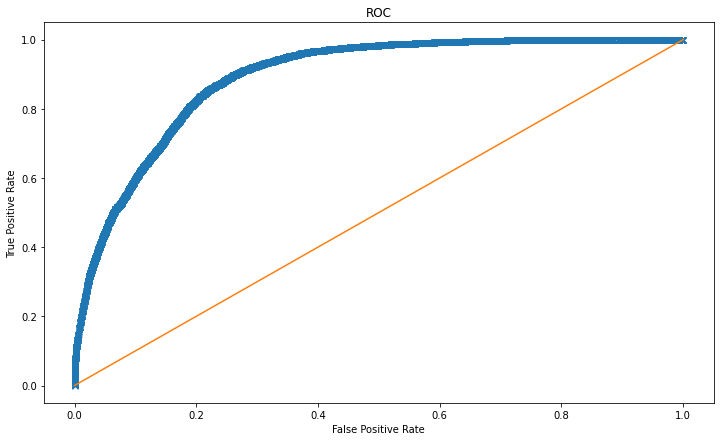

Area under Curve is 0.8909166805670663


In [ ]:
rf_fpr, rf_tpr,_ = roc_curve(y_train,grid_result_cv3_best.predict_proba(X_train_final)[:,1]) # keeping positive probs only
plt.figure(figsize=(12,7))
plt.plot(rf_fpr,rf_tpr, marker='x', label='XG Boost')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
cutoff = 0.5
# plt.text(0.015624763776551516,0.6416704445451878, f"Default-cutoff = {cutoff}", bbox={'facecolor': 'red','alpha':0.5})
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(y_train,grid_result_cv3_best.predict_proba(X_train_final)[:,1]))

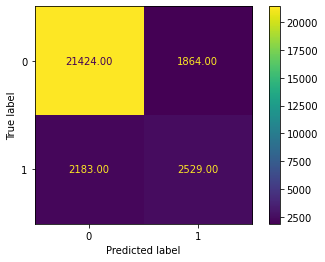

In [ ]:
plot_confusion_matrix(grid_result_cv3_best, X_train_final,y_train,values_format = '.2f');

#### **Test Data Validation**

In [ ]:
# Prediction will be on test data
y_test_pred_xgb_gcv3 = grid_result_cv3_best.predict(X_test_final)
print(classification_report(y_test,y_test_pred_xgb_gcv3))

              precision    recall  f1-score   support

           0       0.91      0.92      0.91      9981
           1       0.58      0.53      0.55      2019

    accuracy                           0.86     12000
   macro avg       0.74      0.73      0.73     12000
weighted avg       0.85      0.86      0.85     12000



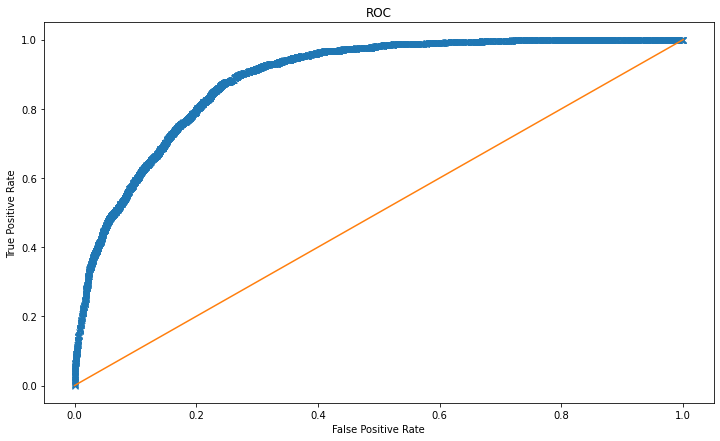

Area under Curve is 0.88680243329091


In [ ]:
rf_fpr, rf_tpr,_ = roc_curve(y_test,grid_result_cv3_best.predict_proba(X_test_final)[:,1]) # keeping positive probs only
plt.figure(figsize=(12,7))
plt.plot(rf_fpr,rf_tpr, marker='x', label='XG Boost')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
cutoff = 0.5
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(y_test,grid_result_cv3_best.predict_proba(X_test_final)[:,1]))

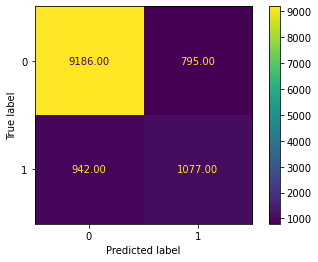

In [ ]:
plot_confusion_matrix(grid_result_cv3_best, X_test_final,y_test,values_format = '.2f');

#### **Feature Importance**

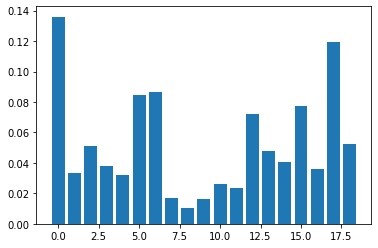

In [ ]:
plt.bar(range(len(grid_result_cv3_best.feature_importances_)), grid_result_cv3_best.feature_importances_)
plt.show()

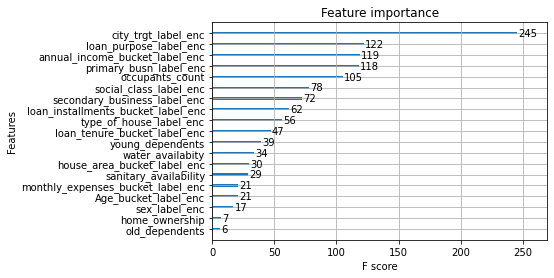

In [ ]:
# plot feature importance
plot_importance(grid_result_cv3_best)
plt.show();

### **Subsample and colsamples**

In [ ]:
param_test4 = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}
param_test4

{'colsample_bytree': [0.6, 0.7, 0.8, 0.9], 'subsample': [0.6, 0.7, 0.8, 0.9]}

In [ ]:
%%time
xgb4 = xgb.XGBClassifier(learning_rate =0.1,
              n_estimators = 185,
              # subsample=0.8,
              # colsample_bytree=0.8,
              objective= 'binary:logistic',
              nthread=4,
              min_child_weight = 5,
              scale_pos_weight = 5, # increasing the weights a little bit to imporve the errors
              seed=27)

gsearch4 = GridSearchCV(estimator = xgb4, param_grid = param_test4,
                        scoring='f1',
                        n_jobs=4,
                        iid=False, 
                        cv=5)

# Fit the grid
grid_result4 = gsearch4.fit(X_train_final,y_train)

# report the best configuration
print("Best: %f using %s" % (grid_result4.best_score_, grid_result4.best_params_))

Best: 0.571473 using {'colsample_bytree': 0.7, 'subsample': 0.6}
CPU times: user 5.66 s, sys: 332 ms, total: 5.99 s
Wall time: 2min 32s


In [ ]:
grid_result_cv4_best = grid_result4.best_estimator_

#### **Train Data Validation**

In [ ]:
# Prediction will be on test data
y_train_pred_xgb_gcv4 = grid_result_cv4_best.predict(X_train_final)
print(classification_report(y_train,y_train_pred_xgb_gcv4))

              precision    recall  f1-score   support

           0       0.97      0.77      0.86     23288
           1       0.44      0.86      0.58      4712

    accuracy                           0.79     28000
   macro avg       0.70      0.82      0.72     28000
weighted avg       0.88      0.79      0.81     28000



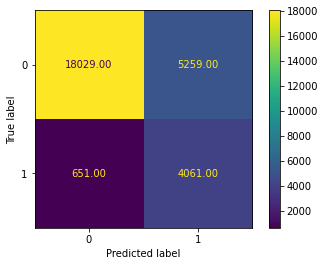

In [ ]:
plot_confusion_matrix(grid_result_cv4_best, X_train_final,y_train,values_format = '.2f');

#### **Test Data Validation**

In [ ]:
# Prediction will be on test data
y_test_pred_xgb_gcv4 = grid_result_cv4_best.predict(X_test_final)
print(classification_report(y_test,y_test_pred_xgb_gcv4))

              precision    recall  f1-score   support

           0       0.96      0.77      0.86      9981
           1       0.43      0.85      0.57      2019

    accuracy                           0.78     12000
   macro avg       0.70      0.81      0.71     12000
weighted avg       0.87      0.78      0.81     12000



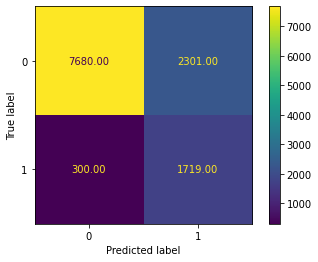

In [ ]:
plot_confusion_matrix(grid_result_cv4_best, X_test_final,y_test,values_format = '.2f');

#### **Feature Importance**

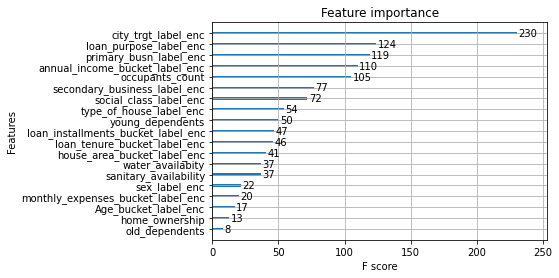

In [ ]:
# plot feature importance
plot_importance(grid_result_cv4_best)
plt.show();

### **Learning Rate**

In [ ]:
param_test5 = {
 'learning_rate':[0.01,0.03, 0.05, 0.1, 0.2, 0.3,0.4,0.5]
}
param_test5

{'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.2, 0.3]}

In [ ]:
%%time
xgb5 = xgb.XGBClassifier(n_estimators = 500, #Increasing the no. of trees
              colsample_bytree = 0.7, 
              subsample= 0.6,
              objective= 'binary:logistic',
              nthread=4,
              gamma = 0.1, # kept it at original levels
              min_child_weight = 5,
              scale_pos_weight = 5, # reducing the weights a little bit to imporve the errors
              seed=27)

gsearch5 = GridSearchCV(estimator = xgb5, 
                        param_grid = param_test5,
                        scoring='f1',
                        n_jobs=4,
                        cv=5)

# Fit the grid
grid_result5 = gsearch5.fit(X_train_final,y_train)

# report the best configuration
print("Best: %f using %s" % (grid_result5.best_score_, grid_result5.best_params_))

grid_result_cv5_best = grid_result5.best_estimator_

Best: 0.599752 using {'learning_rate': 0.3}
CPU times: user 12.8 s, sys: 640 ms, total: 13.5 s
Wall time: 2min 46s


#### **Train Data Validation**

In [ ]:
# Prediction will be on test data
y_train_pred_xgb_gcv5 = grid_result_cv5_best.predict(X_train_final)
print(classification_report(y_train,y_train_pred_xgb_gcv5))

              precision    recall  f1-score   support

           0       0.98      0.81      0.88     23288
           1       0.49      0.91      0.63      4712

    accuracy                           0.82     28000
   macro avg       0.73      0.86      0.76     28000
weighted avg       0.90      0.82      0.84     28000



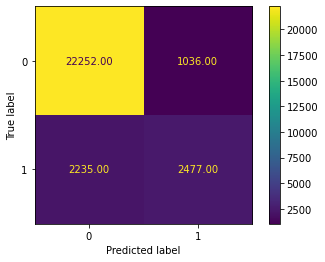

In [ ]:
plot_confusion_matrix(grid_result_cv4_best, X_train_final,y_train,values_format = '.2f');

#### **Test Data Validation**

In [ ]:
# Prediction will be on test data
y_test_pred_xgb_gcv5 = grid_result_cv5_best.predict(X_test_final)
print(classification_report(y_test,y_test_pred_xgb_gcv5))

              precision    recall  f1-score   support

           0       0.96      0.80      0.87      9981
           1       0.46      0.86      0.60      2019

    accuracy                           0.81     12000
   macro avg       0.71      0.83      0.73     12000
weighted avg       0.88      0.81      0.83     12000



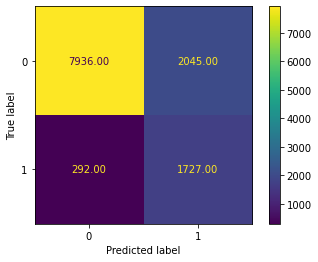

In [ ]:
plot_confusion_matrix(grid_result_cv5_best, X_test_final,y_test,values_format = '.2f');

#### **Feature Importance**

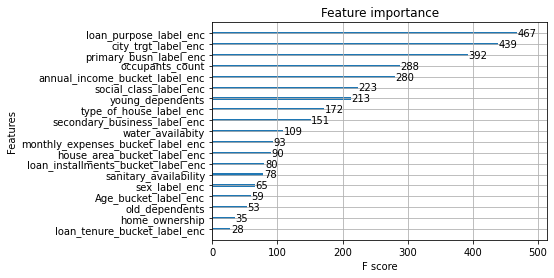

In [ ]:
# plot feature importance
plot_importance(grid_result_cv5_best)
plt.show();

# **Light GBM Classifier**

In [ ]:
import lightgbm as lgb

## **Hyperparameter Tuning**

In [ ]:
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform

param_test ={'num_leaves': sp_randint(6, 100), 
             'min_child_weight': [1,3,4,5,6,7,8,9,10],
             'subsample': [0.8,1], 
             'colsample_bytree': [0.8,1],
             'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
             'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100],
             'max_depth': [5,10,13,15],
             "learning_rate" : [0.09,0.1,0.12,0.16,0.2],
             "boosting_type" : ['gbdt', 'dart']
             }
param_test

{'boosting_type': ['gbdt', 'dart'],
 'colsample_bytree': [0.8, 1],
 'learning_rate': [0.09, 0.1, 0.12, 0.16, 0.2],
 'max_depth': [5, 10, 13, 15],
 'min_child_weight': [1, 3, 4, 5, 6, 7, 8, 9, 10],
 'num_leaves': <scipy.stats._distn_infrastructure.rv_frozen at 0x7fd5ce3965d0>,
 'reg_alpha': [0, 0.1, 1, 2, 5, 7, 10, 50, 100],
 'reg_lambda': [0, 0.1, 1, 5, 10, 20, 50, 100],
 'subsample': [0.8, 1]}

In [ ]:
fit_params = {"early_stopping_rounds":30, 
            "eval_metric" : 'f1', 
            "eval_set" : [(X_test_final,y_test)],
            'eval_names': ['valid'],
            'verbose': 100,
            'categorical_feature': 'auto'}

This allows us to avoid overtraining and we do not need to optimise the number of trees

In [ ]:
#This parameter defines the number of HP points to be tested
n_HP_points_to_test = 100

import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# n_estimators is set to a "large value". The actual number of trees build will depend on early stopping and 5000 define only the absolute maximum
lgbm = lgb.LGBMClassifier(max_depth = -1,
                         random_state=314, 
                         silent=True, 
                         metric='None', 
                         n_jobs=4,
                         n_estimators = 5000)
gs_lgbm = RandomizedSearchCV(
    estimator = lgbm,
    param_distributions=param_test, 
    n_iter = n_HP_points_to_test,
    scoring = 'f1',
    cv=3,
    refit=True,
    random_state = 1,
    verbose=True)

In [ ]:
gs_lgbm.fit(X_train_final, y_train, **fit_params)
print('Best score reached: {} with params: {} '.format(gs_lgbm.best_score_, gs_lgbm.best_params_))

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


## **Feature Importance**

In [ ]:
feat_imp = pd.Series(clf_final.feature_importances_, 
                     index = application_train_ohe.drop(['SK_ID_CURR', 'TARGET'], axis=1).columns)
feat_imp.nlargest(20).plot(kind='barh', figsize=(8,10))